In [2]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [3]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment Analysis provided by Upasana - Tweets need to be cleaned prior to using.**


In [5]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Read in list of users to analyze**

In [6]:
df = pd.read_csv('Filtered_EnglishUsers_MentionBackedUsers.csv')
# df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
UserList = list(df['Users'])

In [7]:
print(UserList[0])
len(UserList)

Gypsy7714


623

In [8]:
iraContactPoints = pd.read_csv('contact_IRAtoUser.csv')
# iraContactPoints.head()

**Create dict of contact points, formatted: username -> [list of contact points]**

In [9]:
iraContactDict = {}
for i in range(len(iraContactPoints)):
    
    temp_list = iraContactPoints['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints['username'][i]] = temp_list


In [10]:
for key in iraContactDict:
    temp_list = iraContactDict[key]
    temp_list.sort()


In [11]:
# for key in iraContactDict:
#     print(key)
#     print(iraContactDict[key])
#     print("\n\n")

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**


In [12]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [13]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Create new DataFrame, which will hold all before / after analysis date in the form of lists**

In [14]:
# beforeAfterDF = pd.DataFrame(columns=['username', 'first_contact', 'second_contact',
#                                       'third_contact','tweet_count','sentiment_scores', 
#                                       'trump_count', 'clinton_count','trump_sent','clinton_sent',
#                                       'positive_sent', 'negative_sent'])

In [15]:
# befAftCounts = pd.DataFrame(columns=['username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3',
#                                     'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3',
#                                     'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3',
#                                     'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3',
#                                     'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3',
#                                     'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3',
#                                     'before_sentiment1', 'before_sentiment2', 'before_sentiment3',
#                                     'after_sentiment1', 'after_sentiment2', 'after_sentiment3',
#                                     'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3',
#                                     'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3',
#                                     'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3',
#                                     'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3',
#                                     'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3',
#                                     'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',
#                                     'before_negative_sent1', 'before_negative_sent2', 'before_negative_sent3',
#                                     'after_negative_sent1', 'after_negative_sent2', 'after_negative_sent3'
#                                     ])

In [16]:
beforeAfterDict = {}
befAftCountsDict = {}

In [17]:
first_tweet_dict = {}
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(10):
    try:
        #create temp DF
        temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'+UserList[i]+'.csv', header=None, low_memory=False)
        #save first tweet date
        first_tweet_date = temp_user_db[3][len(temp_user_db)-1]
        first_tweet_dict[UserList[i]] = first_tweet_date
        #initialize values
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        
        username = UserList[i]
        contact_list = iraContactDict[username]
        first_contact = contact_list[0][:-6]
        first_contact = dt.strptime(first_contact, "%Y-%m-%d")
        second_contact = None
        third_contact = None
        if(len(contact_list) >= 2):
            second_contact = contact_list[1][:-6]
            second_contact = dt.strptime(second_contact, "%Y-%m-%d")
        if(len(contact_list) >= 3):
            third_contact = contact_list[2][:-6]
            third_contact = dt.strptime(third_contact, "%Y-%m-%d")
        #iterate through all tweets
        for j in range(len(temp_user_db)):
            #year one check
            current_date = temp_user_db[3][j]
            current_date = dt.strptime(current_date, "%Y-%m-%d")
            difference = ((((current_date - first_contact).total_seconds())/60)/60)/24
            if(difference >= -372 and difference <= 372):
                temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                if(difference < 0):
                    if (difference <= -341 and difference > -372): #-12
                        tweet_count[0] +=1
                        if trump_flag: trump_count[0] += 1
                        if clinton_flag: clinton_count[0] += 1
                        sentiment_scores[0].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[0].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[0].append(temp_sent)
                        if temp_sent > 0: positive_sent[0].append(temp_sent)
                        if temp_sent < 0: negative_sent[0].append(temp_sent)
                    elif (difference <= -310 and difference > -341): #-11
                        tweet_count[1] +=1
                        if trump_flag: trump_count[1] += 1
                        if clinton_flag: clinton_count[1] += 1
                        sentiment_scores[1].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[1].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[1].append(temp_sent)
                        if temp_sent > 0: positive_sent[1].append(temp_sent)
                        if temp_sent < 0: negative_sent[1].append(temp_sent)
                    elif (difference <= -279 and difference > -310): #-10
                        tweet_count[2] +=1
                        if trump_flag: trump_count[2] += 1
                        if clinton_flag: clinton_count[2] += 1
                        sentiment_scores[2].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[2].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[2].append(temp_sent)
                        if temp_sent > 0: positive_sent[2].append(temp_sent)
                        if temp_sent < 0: negative_sent[2].append(temp_sent)
                    elif (difference <= -248 and difference > -279): #-9
                        tweet_count[3] +=1
                        if trump_flag: trump_count[3] += 1
                        if clinton_flag: clinton_count[3] += 1
                        sentiment_scores[3].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[3].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[3].append(temp_sent)
                        if temp_sent > 0: positive_sent[3].append(temp_sent)
                        if temp_sent < 0: negative_sent[3].append(temp_sent)
                    elif (difference <= -217 and difference > -248): #-8
                        tweet_count[4] +=1
                        if trump_flag: trump_count[4] += 1
                        if clinton_flag: clinton_count[4] += 1
                        sentiment_scores[4].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[4].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[4].append(temp_sent)
                        if temp_sent > 0: positive_sent[4].append(temp_sent)
                        if temp_sent < 0: negative_sent[4].append(temp_sent)
                    elif (difference <= -186 and difference > -217): #-7
                        tweet_count[5] +=1
                        if trump_flag: trump_count[5] += 1
                        if clinton_flag: clinton_count[5] += 1
                        sentiment_scores[5].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[5].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[5].append(temp_sent)
                        if temp_sent > 0: positive_sent[5].append(temp_sent)
                        if temp_sent < 0: negative_sent[5].append(temp_sent)    
                    elif (difference <= -155 and difference > -186): #-6
                        tweet_count[6] +=1
                        if trump_flag: trump_count[6] += 1
                        if clinton_flag: clinton_count[6] += 1
                        sentiment_scores[6].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[6].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[6].append(temp_sent)
                        if temp_sent > 0: positive_sent[6].append(temp_sent)
                        if temp_sent < 0: negative_sent[6].append(temp_sent)
                    elif (difference <= -124 and difference > -155): #-5
                        tweet_count[7] +=1
                        if trump_flag: trump_count[7] += 1
                        if clinton_flag: clinton_count[7] += 1
                        sentiment_scores[7].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[7].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[7].append(temp_sent)
                        if temp_sent > 0: positive_sent[7].append(temp_sent)
                        if temp_sent < 0: negative_sent[7].append(temp_sent)
                    elif (difference <= -93 and difference > -124): #-4
                        tweet_count[8] +=1
                        if trump_flag: trump_count[8] += 1
                        if clinton_flag: clinton_count[8] += 1
                        sentiment_scores[8].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[8].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[8].append(temp_sent)
                        if temp_sent > 0: positive_sent[8].append(temp_sent)
                        if temp_sent < 0: negative_sent[8].append(temp_sent)
                    elif (difference <= -62 and difference > -93): #-3
                        tweet_count[9] +=1
                        if trump_flag: trump_count[9] += 1
                        if clinton_flag: clinton_count[9] += 1
                        sentiment_scores[9].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[9].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[9].append(temp_sent)
                        if temp_sent > 0: positive_sent[9].append(temp_sent)
                        if temp_sent < 0: negative_sent[9].append(temp_sent)
                    elif (difference <= -31 and difference > -62): #-2
                        tweet_count[10] +=1
                        if trump_flag: trump_count[10] += 1
                        if clinton_flag: clinton_count[10] += 1
                        sentiment_scores[10].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[10].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[10].append(temp_sent)
                        if temp_sent > 0: positive_sent[10].append(temp_sent)
                        if temp_sent < 0: negative_sent[10].append(temp_sent)
                    elif (difference <= 0 and difference > -31): #-1
                        tweet_count[11] +=1
                        if trump_flag: trump_count[11] += 1
                        if clinton_flag: clinton_count[11] += 1
                        sentiment_scores[11].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[11].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[11].append(temp_sent)
                        if temp_sent > 0: positive_sent[11].append(temp_sent)
                        if temp_sent < 0: negative_sent[11].append(temp_sent)
                if(difference >= 0):
                    if (difference >= 0 and difference < 31): #1 
                        tweet_count[12] +=1
                        if trump_flag: trump_count[12] += 1
                        if clinton_flag: clinton_count[12] += 1
                        sentiment_scores[12].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[12].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[12].append(temp_sent)
                        if temp_sent > 0: positive_sent[12].append(temp_sent)
                        if temp_sent < 0: negative_sent[12].append(temp_sent)
                    elif (difference >= 31 and difference < 62): #2 
                        tweet_count[13] +=1
                        if trump_flag: trump_count[13] += 1
                        if clinton_flag: clinton_count[13] += 1
                        sentiment_scores[13].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[13].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[13].append(temp_sent)
                        if temp_sent > 0: positive_sent[13].append(temp_sent)
                        if temp_sent < 0: negative_sent[13].append(temp_sent)
                    elif (difference >= 62 and difference < 93): #3
                        tweet_count[14] +=1
                        if trump_flag: trump_count[14] += 1
                        if clinton_flag: clinton_count[14] += 1
                        sentiment_scores[14].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[14].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[14].append(temp_sent)
                        if temp_sent > 0: positive_sent[14].append(temp_sent)
                        if temp_sent < 0: negative_sent[14].append(temp_sent)
                    elif (difference >= 93 and difference < 124): #4
                        tweet_count[15] +=1
                        if trump_flag: trump_count[15] += 1
                        if clinton_flag: clinton_count[15] += 1
                        sentiment_scores[15].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[15].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[15].append(temp_sent)
                        if temp_sent > 0: positive_sent[15].append(temp_sent)
                        if temp_sent < 0: negative_sent[15].append(temp_sent)
                    elif (difference >= 124 and difference < 155): #5
                        tweet_count[16] +=1
                        if trump_flag: trump_count[16] += 1
                        if clinton_flag: clinton_count[16] += 1
                        sentiment_scores[16].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[16].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[16].append(temp_sent)
                        if temp_sent > 0: positive_sent[16].append(temp_sent)
                        if temp_sent < 0: negative_sent[16].append(temp_sent)
                    elif (difference >= 155 and difference < 186): #6
                        tweet_count[17] +=1
                        if trump_flag: trump_count[17] += 1
                        if clinton_flag: clinton_count[17] += 1
                        sentiment_scores[17].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[17].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[17].append(temp_sent)
                        if temp_sent > 0: positive_sent[17].append(temp_sent)
                        if temp_sent < 0: negative_sent[17].append(temp_sent)
                    elif (difference >= 186 and difference < 217): #7
                        tweet_count[18] +=1
                        if trump_flag: trump_count[18] += 1
                        if clinton_flag: clinton_count[18] += 1
                        sentiment_scores[18].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[18].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[18].append(temp_sent)
                        if temp_sent > 0: positive_sent[18].append(temp_sent)
                        if temp_sent < 0: negative_sent[18].append(temp_sent)
                    elif (difference >= 217 and difference < 248): #8
                        tweet_count[19] += 1
                        if trump_flag: trump_count[19] += 1
                        if clinton_flag: clinton_count[19] += 1
                        sentiment_scores[19].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[19].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[19].append(temp_sent)
                        if temp_sent > 0: positive_sent[19].append(temp_sent)
                        if temp_sent < 0: negative_sent[19].append(temp_sent)
                    elif (difference >= 248 and difference < 279): #9
                        tweet_count[20] +=1
                        if trump_flag: trump_count[20] += 1
                        if clinton_flag: clinton_count[20] += 1
                        sentiment_scores[20].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[20].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[20].append(temp_sent)
                        if temp_sent > 0: positive_sent[20].append(temp_sent)
                        if temp_sent < 0: negative_sent[20].append(temp_sent)
                    elif (difference >= 279 and difference < 310): #10
                        tweet_count[21] +=1
                        if trump_flag: trump_count[21] += 1
                        if clinton_flag: clinton_count[21] += 1
                        sentiment_scores[21].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[21].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[21].append(temp_sent)
                        if temp_sent > 0: positive_sent[21].append(temp_sent)
                        if temp_sent < 0: negative_sent[21].append(temp_sent)
                    elif (difference >= 310 and difference < 341): #11 
                        tweet_count[22] +=1
                        if trump_flag: trump_count[22] += 1
                        if clinton_flag: clinton_count[22] += 1
                        sentiment_scores[22].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[22].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[22].append(temp_sent)
                        if temp_sent > 0: positive_sent[22].append(temp_sent)
                        if temp_sent < 0: negative_sent[22].append(temp_sent)
                    elif (difference >= 341 and difference < 372): #12  
                        tweet_count[23] +=1
                        if trump_flag: trump_count[23] += 1
                        if clinton_flag: clinton_count[23] += 1
                        sentiment_scores[23].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[23].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[23].append(temp_sent)
                        if temp_sent > 0: positive_sent[23].append(temp_sent)
                        if temp_sent < 0: negative_sent[23].append(temp_sent)
            #year two check
            if(second_contact != None):
                difference = ((((current_date - second_contact).total_seconds())/60)/60)/24
                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[24] +=1
                            if trump_flag: trump_count[24] += 1
                            if clinton_flag: clinton_count[24] += 1
                            sentiment_scores[24].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[24].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[24].append(temp_sent)
                            if temp_sent > 0: positive_sent[24].append(temp_sent)
                            if temp_sent < 0: negative_sent[24].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[25] +=1
                            if trump_flag: trump_count[25] += 1
                            if clinton_flag: clinton_count[25] += 1
                            sentiment_scores[25].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[25].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[25].append(temp_sent)
                            if temp_sent > 0: positive_sent[25].append(temp_sent)
                            if temp_sent < 0: negative_sent[25].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[26] +=1
                            if trump_flag: trump_count[26] += 1
                            if clinton_flag: clinton_count[26] += 1
                            sentiment_scores[26].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[26].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[26].append(temp_sent)
                            if temp_sent > 0: positive_sent[26].append(temp_sent)
                            if temp_sent < 0: negative_sent[26].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[27] +=1
                            if trump_flag: trump_count[27] += 1
                            if clinton_flag: clinton_count[27] += 1
                            sentiment_scores[27].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[27].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[27].append(temp_sent)
                            if temp_sent > 0: positive_sent[27].append(temp_sent)
                            if temp_sent < 0: negative_sent[27].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[28] +=1
                            if trump_flag: trump_count[28] += 1
                            if clinton_flag: clinton_count[28] += 1
                            sentiment_scores[28].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[28].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[28].append(temp_sent)
                            if temp_sent > 0: positive_sent[28].append(temp_sent)
                            if temp_sent < 0: negative_sent[28].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[29] +=1
                            if trump_flag: trump_count[29] += 1
                            if clinton_flag: clinton_count[29] += 1
                            sentiment_scores[29].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[29].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[29].append(temp_sent)
                            if temp_sent > 0: positive_sent[29].append(temp_sent)
                            if temp_sent < 0: negative_sent[29].append(temp_sent)
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[30] +=1
                            if trump_flag: trump_count[30] += 1
                            if clinton_flag: clinton_count[30] += 1
                            sentiment_scores[30].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[30].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[30].append(temp_sent)
                            if temp_sent > 0: positive_sent[30].append(temp_sent)
                            if temp_sent < 0: negative_sent[30].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[31] +=1
                            if trump_flag: trump_count[31] += 1
                            if clinton_flag: clinton_count[31] += 1
                            sentiment_scores[31].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[31].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[31].append(temp_sent)
                            if temp_sent > 0: positive_sent[31].append(temp_sent)
                            if temp_sent < 0: negative_sent[31].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[32] +=1
                            if trump_flag: trump_count[32] += 1
                            if clinton_flag: clinton_count[32] += 1
                            sentiment_scores[32].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[32].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[32].append(temp_sent)
                            if temp_sent > 0: positive_sent[32].append(temp_sent)
                            if temp_sent < 0: negative_sent[32].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[33] +=1
                            if trump_flag: trump_count[33] += 1
                            if clinton_flag: clinton_count[33] += 1
                            sentiment_scores[33].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[33].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[33].append(temp_sent)
                            if temp_sent > 0: positive_sent[33].append(temp_sent)
                            if temp_sent < 0: negative_sent[33].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[34] +=1
                            if trump_flag: trump_count[34] += 1
                            if clinton_flag: clinton_count[34] += 1
                            sentiment_scores[34].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[34].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[34].append(temp_sent)
                            if temp_sent > 0: positive_sent[34].append(temp_sent)
                            if temp_sent < 0: negative_sent[34].append(temp_sent)
                        elif (difference <= 0 and difference > -31): #-1
                            tweet_count[35] +=1
                            if trump_flag: trump_count[35] += 1
                            if clinton_flag: clinton_count[35] += 1
                            sentiment_scores[35].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[35].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[35].append(temp_sent)
                            if temp_sent > 0: positive_sent[35].append(temp_sent)
                            if temp_sent < 0: negative_sent[35].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[36] +=1
                            if trump_flag: trump_count[36] += 1
                            if clinton_flag: clinton_count[36] += 1
                            sentiment_scores[36].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[36].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[36].append(temp_sent)
                            if temp_sent > 0: positive_sent[36].append(temp_sent)
                            if temp_sent < 0: negative_sent[36].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[37] +=1
                            if trump_flag: trump_count[37] += 1
                            if clinton_flag: clinton_count[37] += 1
                            sentiment_scores[37].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[37].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[37].append(temp_sent)
                            if temp_sent > 0: positive_sent[37].append(temp_sent)
                            if temp_sent < 0: negative_sent[37].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[38] +=1
                            if trump_flag: trump_count[38] += 1
                            if clinton_flag: clinton_count[38] += 1
                            sentiment_scores[38].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[38].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[38].append(temp_sent)
                            if temp_sent > 0: positive_sent[38].append(temp_sent)
                            if temp_sent < 0: negative_sent[38].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[39] +=1
                            if trump_flag: trump_count[39] += 1
                            if clinton_flag: clinton_count[39] += 1
                            sentiment_scores[39].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[39].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[39].append(temp_sent)
                            if temp_sent > 0: positive_sent[39].append(temp_sent)
                            if temp_sent < 0: negative_sent[39].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[40] +=1
                            if trump_flag: trump_count[40] += 1
                            if clinton_flag: clinton_count[40] += 1
                            sentiment_scores[40].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[40].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[40].append(temp_sent)
                            if temp_sent > 0: positive_sent[40].append(temp_sent)
                            if temp_sent < 0: negative_sent[40].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[41] +=1
                            if trump_flag: trump_count[41] += 1
                            if clinton_flag: clinton_count[41] += 1
                            sentiment_scores[41].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[41].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[41].append(temp_sent)
                            if temp_sent > 0: positive_sent[41].append(temp_sent)
                            if temp_sent < 0: negative_sent[41].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[42] +=1
                            if trump_flag: trump_count[42] += 1
                            if clinton_flag: clinton_count[42] += 1
                            sentiment_scores[42].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[42].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[42].append(temp_sent)
                            if temp_sent > 0: positive_sent[42].append(temp_sent)
                            if temp_sent < 0: negative_sent[42].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[43] += 1
                            if trump_flag: trump_count[43] += 1
                            if clinton_flag: clinton_count[43] += 1
                            sentiment_scores[43].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[43].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[43].append(temp_sent)
                            if temp_sent > 0: positive_sent[43].append(temp_sent)
                            if temp_sent < 0: negative_sent[43].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[44] +=1
                            if trump_flag: trump_count[44] += 1
                            if clinton_flag: clinton_count[44] += 1
                            sentiment_scores[44].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[44].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[44].append(temp_sent)
                            if temp_sent > 0: positive_sent[44].append(temp_sent)
                            if temp_sent < 0: negative_sent[44].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[45] +=1
                            if trump_flag: trump_count[45] += 1
                            if clinton_flag: clinton_count[45] += 1
                            sentiment_scores[45].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[45].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[45].append(temp_sent)
                            if temp_sent > 0: positive_sent[45].append(temp_sent)
                            if temp_sent < 0: negative_sent[45].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[46] +=1
                            if trump_flag: trump_count[46] += 1
                            if clinton_flag: clinton_count[46] += 1
                            sentiment_scores[46].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[46].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[46].append(temp_sent)
                            if temp_sent > 0: positive_sent[46].append(temp_sent)
                            if temp_sent < 0: negative_sent[46].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[47] +=1
                            if trump_flag: trump_count[47] += 1
                            if clinton_flag: clinton_count[47] += 1
                            sentiment_scores[47].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[47].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[47].append(temp_sent)
                            if temp_sent > 0: positive_sent[47].append(temp_sent)
                            if temp_sent < 0: negative_sent[47].append(temp_sent)
            #year three check
            if(third_contact != None):
                difference = ((((current_date - third_contact).total_seconds())/60)/60)/24
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[48] +=1
                            if trump_flag: trump_count[48] += 1
                            if clinton_flag: clinton_count[48] += 1
                            sentiment_scores[48].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[48].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[48].append(temp_sent)
                            if temp_sent > 0: positive_sent[48].append(temp_sent)
                            if temp_sent < 0: negative_sent[48].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[49] +=1
                            if trump_flag: trump_count[49] += 1
                            if clinton_flag: clinton_count[49] += 1
                            sentiment_scores[49].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[49].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[49].append(temp_sent)
                            if temp_sent > 0: positive_sent[49].append(temp_sent)
                            if temp_sent < 0: negative_sent[49].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[50] +=1
                            if trump_flag: trump_count[50] += 1
                            if clinton_flag: clinton_count[50] += 1
                            sentiment_scores[50].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[50].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[50].append(temp_sent)
                            if temp_sent > 0: positive_sent[50].append(temp_sent)
                            if temp_sent < 0: negative_sent[50].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[51] +=1
                            if trump_flag: trump_count[51] += 1
                            if clinton_flag: clinton_count[51] += 1
                            sentiment_scores[51].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[51].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[51].append(temp_sent)
                            if temp_sent > 0: positive_sent[51].append(temp_sent)
                            if temp_sent < 0: negative_sent[51].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[52] +=1
                            if trump_flag: trump_count[52] += 1
                            if clinton_flag: clinton_count[52] += 1
                            sentiment_scores[52].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[52].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[52].append(temp_sent)
                            if temp_sent > 0: positive_sent[52].append(temp_sent)
                            if temp_sent < 0: negative_sent[52].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[53] +=1
                            if trump_flag: trump_count[53] += 1
                            if clinton_flag: clinton_count[53] += 1
                            sentiment_scores[53].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[53].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[53].append(temp_sent)
                            if temp_sent > 0: positive_sent[53].append(temp_sent)
                            if temp_sent < 0: negative_sent[53].append(temp_sent)
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[54] +=1
                            if trump_flag: trump_count[54] += 1
                            if clinton_flag: clinton_count[54] += 1
                            sentiment_scores[54].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[54].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[54].append(temp_sent)
                            if temp_sent > 0: positive_sent[54].append(temp_sent)
                            if temp_sent < 0: negative_sent[54].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[55] +=1
                            if trump_flag: trump_count[55] += 1
                            if clinton_flag: clinton_count[55] += 1
                            sentiment_scores[55].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[55].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[55].append(temp_sent)
                            if temp_sent > 0: positive_sent[55].append(temp_sent)
                            if temp_sent < 0: negative_sent[55].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[56] +=1
                            if trump_flag: trump_count[56] += 1
                            if clinton_flag: clinton_count[56] += 1
                            sentiment_scores[56].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[56].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[56].append(temp_sent)
                            if temp_sent > 0: positive_sent[56].append(temp_sent)
                            if temp_sent < 0: negative_sent[56].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[57] +=1
                            if trump_flag: trump_count[57] += 1
                            if clinton_flag: clinton_count[57] += 1
                            sentiment_scores[57].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[57].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[57].append(temp_sent)
                            if temp_sent > 0: positive_sent[57].append(temp_sent)
                            if temp_sent < 0: negative_sent[57].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[58] +=1
                            if trump_flag: trump_count[58] += 1
                            if clinton_flag: clinton_count[58] += 1
                            sentiment_scores[58].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[58].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[58].append(temp_sent)
                            if temp_sent > 0: positive_sent[58].append(temp_sent)
                            if temp_sent < 0: negative_sent[58].append(temp_sent)
                        elif (difference < 0 and difference > -31): #-1
                            tweet_count[59] +=1
                            if trump_flag: trump_count[59] += 1
                            if clinton_flag: clinton_count[59] += 1
                            sentiment_scores[59].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[59].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[59].append(temp_sent)
                            if temp_sent > 0: positive_sent[59].append(temp_sent)
                            if temp_sent < 0: negative_sent[59].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[60] +=1
                            if trump_flag: trump_count[60] += 1
                            if clinton_flag: clinton_count[60] += 1
                            sentiment_scores[60].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[60].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[60].append(temp_sent)
                            if temp_sent > 0: positive_sent[60].append(temp_sent)
                            if temp_sent < 0: negative_sent[60].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[61] +=1
                            if trump_flag: trump_count[61] += 1
                            if clinton_flag: clinton_count[61] += 1
                            sentiment_scores[61].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[61].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[61].append(temp_sent)
                            if temp_sent > 0: positive_sent[61].append(temp_sent)
                            if temp_sent < 0: negative_sent[61].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[62] +=1
                            if trump_flag: trump_count[62] += 1
                            if clinton_flag: clinton_count[62] += 1
                            sentiment_scores[62].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[62].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[62].append(temp_sent)
                            if temp_sent > 0: positive_sent[62].append(temp_sent)
                            if temp_sent < 0: negative_sent[62].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[63] +=1
                            if trump_flag: trump_count[63] += 1
                            if clinton_flag: clinton_count[63] += 1
                            sentiment_scores[63].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[63].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[63].append(temp_sent)
                            if temp_sent > 0: positive_sent[63].append(temp_sent)
                            if temp_sent < 0: negative_sent[63].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[64] +=1
                            if trump_flag: trump_count[64] += 1
                            if clinton_flag: clinton_count[64] += 1
                            sentiment_scores[64].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[64].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[64].append(temp_sent)
                            if temp_sent > 0: positive_sent[64].append(temp_sent)
                            if temp_sent < 0: negative_sent[64].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[65] +=1
                            if trump_flag: trump_count[65] += 1
                            if clinton_flag: clinton_count[65] += 1
                            sentiment_scores[65].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[65].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[65].append(temp_sent)
                            if temp_sent > 0: positive_sent[65].append(temp_sent)
                            if temp_sent < 0: negative_sent[65].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[66] +=1
                            if trump_flag: trump_count[66] += 1
                            if clinton_flag: clinton_count[66] += 1
                            sentiment_scores[66].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[66].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[66].append(temp_sent)
                            if temp_sent > 0: positive_sent[66].append(temp_sent)
                            if temp_sent < 0: negative_sent[66].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[67] += 1
                            if trump_flag: trump_count[67] += 1
                            if clinton_flag: clinton_count[67] += 1
                            sentiment_scores[67].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[67].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[67].append(temp_sent)
                            if temp_sent > 0: positive_sent[67].append(temp_sent)
                            if temp_sent < 0: negative_sent[67].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[68] +=1
                            if trump_flag: trump_count[68] += 1
                            if clinton_flag: clinton_count[68] += 1
                            sentiment_scores[68].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[68].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[68].append(temp_sent)
                            if temp_sent > 0: positive_sent[68].append(temp_sent)
                            if temp_sent < 0: negative_sent[68].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[69] +=1
                            if trump_flag: trump_count[69] += 1
                            if clinton_flag: clinton_count[69] += 1
                            sentiment_scores[69].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[69].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[69].append(temp_sent)
                            if temp_sent > 0: positive_sent[69].append(temp_sent)
                            if temp_sent < 0: negative_sent[69].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[70] +=1
                            if trump_flag: trump_count[70] += 1
                            if clinton_flag: clinton_count[70] += 1
                            sentiment_scores[70].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[70].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[70].append(temp_sent)
                            if temp_sent > 0: positive_sent[70].append(temp_sent)
                            if temp_sent < 0: negative_sent[70].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[71] +=1
                            if trump_flag: trump_count[71] += 1
                            if clinton_flag: clinton_count[71] += 1
                            sentiment_scores[71].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[71].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[71].append(temp_sent)
                            if temp_sent > 0: positive_sent[71].append(temp_sent)
                            if temp_sent < 0: negative_sent[71].append(temp_sent)
        
        before_sentyear1 = []
        before_sentyear2 = []
        before_sentyear3 = []
        after_sentyear1 = []
        after_sentyear2 = []
        after_sentyear3 = []
        before_trump_sentyear1 = []
        before_trump_sentyear2 = []
        before_trump_sentyear3 = []
        after_trump_sentyear1 = []
        after_trump_sentyear2 = []
        after_trump_sentyear3 = []
        before_clinton_sentyear1 = []
        before_clinton_sentyear2 = []
        before_clinton_sentyear3 = []
        after_clinton_sentyear1 = []
        after_clinton_sentyear2 = []
        after_clinton_sentyear3 = []
        before_tweet1 = 0
        before_tweet2 = 0
        before_tweet3 = 0
        after_tweet1 = 0
        after_tweet2 = 0
        after_tweet3 = 0
        before_trump1 = 0
        before_trump2 = 0
        before_trump3 = 0
        after_trump1 = 0
        after_trump2 = 0
        after_trump3 = 0
        before_clinton1 = 0
        before_clinton2 = 0
        before_clinton3 = 0
        after_clinton1 = 0
        after_clinton2 = 0
        after_clinton3 = 0
        before_positive1 = []
        before_positive2 = []
        before_positive3 = []
        after_positive1 = []
        after_positive2 = []
        after_positive3 = []
        before_negative1 = []
        before_negative2 = []
        before_negative3 = []
        after_negative1 = []
        after_negative2 = []
        after_negative3 = []
        
        for q in range(9,12):
            before_tweet1 += tweet_count[q]
            before_trump1 += trump_count[q]
            before_clinton1 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear1.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear1.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear1.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive1.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative1.append(negative_sent[q][j])
                    
        for q in range(12,15):
            after_tweet1 += tweet_count[q]
            after_trump1 += trump_count[q]
            after_clinton1 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear1.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear1.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear1.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive1.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative1.append(negative_sent[q][j])
                    
                    
        for q in range(33,36):
            before_tweet2 += tweet_count[q]
            before_trump2 += trump_count[q]
            before_clinton2 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear2.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear2.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear2.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive2.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative2.append(negative_sent[q][j])
                    
        for q in range(36,39):
            after_tweet2 += tweet_count[q]
            after_trump2 += trump_count[q]
            after_clinton2 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear2.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear2.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear2.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive2.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative2.append(negative_sent[q][j])
                    
        for q in range(57,60):
            before_tweet3 += tweet_count[q]
            before_trump3 += trump_count[q]
            before_clinton3 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear3.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear3.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear3.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive3.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative3.append(negative_sent[q][j])
                    
        for q in range(60,63):
            after_tweet3 += tweet_count[q]
            after_trump3 += trump_count[q]
            after_clinton3 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear3.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear3.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear3.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive3.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative3.append(negative_sent[q][j])
            
            if(len(before_sentyear1)) == 0:
                before_sentyear1.append(0)
            if(len(before_sentyear2)) == 0:
                before_sentyear2.append(0)
            if(len(before_sentyear3)) == 0:
                before_sentyear3.append(0)
            if(len(after_sentyear1)) == 0:
                after_sentyear1.append(0)
            if(len(after_sentyear2)) == 0:
                after_sentyear2.append(0)
            if(len(after_sentyear3)) == 0:
                after_sentyear3.append(0)
            if(len(before_trump_sentyear1) == 0):
                before_trump_sentyear1.append(0)
            if(len(before_trump_sentyear2) == 0):
                before_trump_sentyear2.append(0)
            if(len(before_trump_sentyear3) == 0):
                before_trump_sentyear3.append(0)
            if(len(after_trump_sentyear1) == 0):
                after_trump_sentyear1.append(0)
            if(len(after_trump_sentyear2) == 0):
                after_trump_sentyear2.append(0)
            if(len(after_trump_sentyear3) == 0):
                after_trump_sentyear3.append(0)
            if(len(before_clinton_sentyear1) == 0):
                before_clinton_sentyear1.append(0)
            if(len(before_clinton_sentyear2) == 0):
                before_clinton_sentyear2.append(0)
            if(len(before_clinton_sentyear3) == 0):
                before_clinton_sentyear3.append(0)
            if(len(after_clinton_sentyear1) == 0):
                after_clinton_sentyear1.append(0)
            if(len(after_clinton_sentyear2) == 0):
                after_clinton_sentyear2.append(0)
            if(len(after_clinton_sentyear3) == 0):
                after_clinton_sentyear3.append(0)
            if(len(before_positive1) == 0):
                before_positive1.append(0)
            if(len(before_positive2) == 0):
                before_positive2.append(0)
            if(len(before_positive3) == 0):
                before_positive3.append(0)
            if(len(after_positive1) == 0):
                after_positive1.append(0)
            if(len(after_positive2) == 0):
                after_positive2.append(0)
            if(len(after_positive3) == 0):
                after_positive3.append(0)
            if(len(before_negative1) == 0):
                before_negative1.append(0)
            if(len(before_negative2) == 0):
                before_negative2.append(0)
            if(len(before_negative3) == 0):
                before_negative3.append(0)
            if(len(after_negative1) == 0):
                after_negative1.append(0)
            if(len(after_negative2) == 0):
                after_negative2.append(0)
            if(len(after_negative3) == 0):
                after_negative3.append(0)
        befAftCountsDict[username] = [before_tweet1, before_tweet2, before_tweet3,
                                     after_tweet1, after_tweet2, after_tweet3,
                                     before_trump1, before_trump2, before_trump3,
                                     after_trump1, after_trump2, after_trump3,
                                     before_clinton1, before_clinton2, before_clinton3,
                                     after_clinton1, after_clinton2, after_clinton3,
                                     statistics.mean(before_sentyear1), statistics.mean(before_sentyear2), statistics.mean(before_sentyear3),
                                     statistics.mean(after_sentyear1), statistics.mean(after_sentyear2), statistics.mean(after_sentyear3),
                                     statistics.mean(before_trump_sentyear1), statistics.mean(before_trump_sentyear2), statistics.mean(before_trump_sentyear3),
                                     statistics.mean(after_trump_sentyear1), statistics.mean(after_trump_sentyear2), statistics.mean(after_trump_sentyear3),
                                     statistics.mean(before_clinton_sentyear1), statistics.mean(before_clinton_sentyear2), statistics.mean(before_clinton_sentyear3), 
                                     statistics.mean(after_clinton_sentyear1), statistics.mean(after_clinton_sentyear2), statistics.mean(after_clinton_sentyear3),
                                     statistics.mean(before_positive1), statistics.mean(before_positive2), statistics.mean(before_positive3),
                                     statistics.mean(after_positive1), statistics.mean(after_positive2), statistics.mean(after_positive3),
                                     statistics.mean(before_negative1), statistics.mean(before_negative2), statistics.mean(before_negative3),
                                     statistics.mean(after_negative1), statistics.mean(after_negative2), statistics.mean(after_negative3)]      
#         befAftCounts = befAftCounts.append({
#             'username' : username, 
#             'before_tweetcount1' : before_tweet1, 'before_tweetcount2' : before_tweet2, 'before_tweetcount3' : before_tweet3,
#             'after_tweetcount1' : after_tweet1, 'after_tweetcount2' : after_tweet2, 'after_tweetcount3' : after_tweet3,
#             'before_trumpcount1' : before_trump1, 'before_trumpcount2' : before_trump2, 'before_trumpcount3' : before_trump3,
#             'after_trumpcount1' : after_trump1, 'after_trumpcount2' : after_trump2, 'after_trumpcount3' : after_trump3,
#             'before_clintoncount1' : before_clinton1, 'before_clintoncount2' : before_clinton2, 'before_clintoncount3' : before_clinton3,
#             'after_clintoncount1' : after_clinton1, 'after_clintoncount2' : after_clinton2, 'after_clintoncount3' : after_clinton3,
#             'before_sentiment1' : statistics.mean(before_sentyear1), 
#             'before_sentiment2' : statistics.mean(before_sentyear2), 
#             'before_sentiment3' : statistics.mean(before_sentyear3),
#             'after_sentiment1' : statistics.mean(after_sentyear1), 
#             'after_sentiment2' : statistics.mean(after_sentyear2), 
#             'after_sentiment3' : statistics.mean(after_sentyear3),
#             'before_trump_sent1' : statistics.mean(before_trump_sentyear1), 
#             'before_trump_sent2' : statistics.mean(before_trump_sentyear2), 
#             'before_trump_sent3' : statistics.mean(before_trump_sentyear3),
#             'after_trump_sent1' : statistics.mean(after_trump_sentyear1), 
#             'after_trump_sent2' : statistics.mean(after_trump_sentyear2), 
#             'after_trump_sent3' : statistics.mean(after_trump_sentyear3),
#             'before_clinton_sent1' : statistics.mean(before_clinton_sentyear1), 
#             'before_clinton_sent2' : statistics.mean(before_clinton_sentyear2), 
#             'before_clinton_sent3' : statistics.mean(before_clinton_sentyear3),
#             'after_clinton_sent1' : statistics.mean(after_clinton_sentyear1), 
#             'after_clinton_sent2' : statistics.mean(after_clinton_sentyear2), 
#             'after_clinton_sent3' : statistics.mean(after_clinton_sentyear3),
#             'before_positive_sent1' : statistics.mean(before_positive1),
#             'before_positive_sent1' : statistics.mean(before_positive2),
#             'before_positive_sent1' : statistics.mean(before_positive3),
#             'after_positive_sent1' : statistics.mean(after_positive1),
#             'after_positive_sent1' : statistics.mean(after_positive2),
#             'after_positive_sent1' : statistics.mean(after_positive3),
#             'before_negative_sent1' : statistics.mean(before_negative1),
#             'before_negative_sent1' : statistics.mean(before_negative2),
#             'before_negative_sent1' : statistics.mean(before_negative3),
#             'after_negative_sent1' : statistics.mean(after_negative1),
#             'after_negative_sent1' : statistics.mean(after_negative2),
#             'after_negative_sent1' : statistics.mean(after_negative3)
        
#     }, ignore_index = True)
        for k in range(len(sentiment_scores)):
            if(len(sentiment_scores[k]) > 0 ):
                sentiment_scores[k] = statistics.mean(sentiment_scores[k])
            else:
                sentiment_scores[k] = 0
                
        for k in range(len(trump_sent)):
            if(len(trump_sent[k]) > 0 ):
                trump_sent[k] = statistics.mean(trump_sent[k])
            else:
                trump_sent[k] = 0
                
        for k in range(len(clinton_sent)):
            if(len(clinton_sent[k]) > 0 ):
                clinton_sent[k] = statistics.mean(clinton_sent[k])
            else:
                clinton_sent[k] = 0
        for k in range(len(positive_sent)):
            if(len(positive_sent[k]) > 0 ):
                positive_sent[k] = statistics.mean(positive_sent[k])
            else:
                positive_sent[k] = 0
                
        for k in range(len(negative_sent)):
            if(len(negative_sent[k]) > 0 ):
                negative_sent[k] = statistics.mean(negative_sent[k])
            else:
                negative_sent[k] = 0
        beforeAfterDict[username] = [first_contact, second_contact, third_contact, tweet_count,
                                    sentiment_scores, trump_count, clinton_count, trump_sent,
                                    clinton_sent, positive_sent, negative_sent]        
#         beforeAfterDF = beforeAfterDF.append({
#             'username' : username, 'first_contact' : first_contact, 'second_contact' : second_contact,
#             'third_contact' : third_contact, 'tweet_count' : tweet_count, 'sentiment_scores' : sentiment_scores,
#             'trump_count' : trump_count, 'clinton_count' : clinton_count, 'trump_sent' : trump_sent, 
#             'clinton_sent' : clinton_sent, 'positive_sent' : positive_sent, 'negative_sent' : negative_sent
#         }, ignore_index = True) 
        
        print(str(i+1)+" / " + size)
    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))


1 / 623
2 / 623
3 / 623
4 / 623
5 / 623
6 / 623
7 / 623
8 / 623
9 / 623
10 / 623
11 / 623
12 / 623
13 / 623
14 / 623
15 / 623
16 / 623
17 / 623
18 / 623
19 / 623
20 / 623
21 / 623
22 / 623
23 / 623
24 / 623
25 / 623
26 / 623
27 / 623
28 / 623
29 / 623
30 / 623
31 / 623
32 / 623
33 / 623
34 / 623
35 / 623
36 / 623
37 / 623
38 / 623
39 / 623
40 / 623
41 / 623
42 / 623
43 / 623
44 / 623
45 / 623
46 / 623
47 / 623
48 / 623
49 / 623
50 / 623
51 / 623
52 / 623
53 / 623
54 / 623
55 / 623
56 / 623
57 / 623
58 / 623
59 / 623
60 / 623
61 / 623
62 / 623
63 / 623
64 / 623
65 / 623
66 / 623
67 / 623
68 / 623
69 / 623
70 / 623
71 / 623
72 / 623
73 / 623
74 / 623
75 / 623
76 / 623
77 / 623
78 / 623
79 / 623
80 / 623
81 / 623
82 / 623
83 / 623
84 / 623
85 / 623
86 / 623
87 / 623
88 / 623
89 / 623
90 / 623
91 / 623
92 / 623
93 / 623
94 / 623
95 / 623
96 / 623
97 / 623
98 / 623
99 / 623
100 / 623
101 / 623
102 / 623
103 / 623
104 / 623
105 / 623
106 / 623
107 / 623
108 / 623
109 / 623
110 / 623
111 / 62

In [41]:
beforeAfterDF = pd.DataFrame.from_dict(beforeAfterDict, orient='index',
                                       columns=['first_contact', 'second_contact',
                                      'third_contact','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])
befAftCounts = pd.DataFrame.from_dict(befAftCountsDict, orient='index',
                                     columns=['before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3',
                                    'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3',
                                    'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3',
                                    'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3',
                                    'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3',
                                    'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3',
                                    'before_sentiment1', 'before_sentiment2', 'before_sentiment3',
                                    'after_sentiment1', 'after_sentiment2', 'after_sentiment3',
                                    'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3',
                                    'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3',
                                    'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3',
                                    'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3',
                                    'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3',
                                    'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',
                                    'before_negative_sent1', 'before_negative_sent2', 'before_negative_sent3',
                                    'after_negative_sent1', 'after_negative_sent2', 'after_negative_sent3'])

In [42]:
beforeAfterDF.head()

,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
Gypsy7714,2016-05-15,2016-05-15,2016-05-15,"[72, 152, 192, 161, 63, 63, 79, 83, 27, 38, 20...","[-0.20589444444444444, -0.02954736842105263, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.5312166666666667, 0.412677358490566, 0.3853...","[-0.5170487804878049, -0.4625105263157895, -0...."
PoliticaLion,2015-08-30,2016-02-02,2016-11-15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
thejenn999,2016-06-16,2017-04-08,NaT,"[449, 508, 430, 354, 508, 523, 315, 340, 513, ...","[-0.039634521158129175, -0.12608326771653544, ...","[2, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 0, 7, 1, 2, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0386, -0.7953, -0.2808, 0, 0, 0, 0, -0.296...","[0, 0, 0, 0, 0.5106, 0, 0, 0.0, 0, 0, 0, 0, 0,...","[0.4000975, 0.4201905109489051, 0.412435344827...","[-0.4674942857142857, -0.4963934693877551, -0...."
Romey999,2017-04-14,2017-11-20,2017-11-20,"[126, 160, 78, 116, 420, 406, 359, 329, 223, 1...","[0.07803095238095238, 0.035460625, 0.055623076...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 15, 27, 28, 3, 45,...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0.2204, 0, 0, 0, 0, 0, 0, 0, 0.12002666666...","[0, 0, 0, 0, 0, -0.3149, 0, 0, 0, 0, 0.3252, 0...","[0.5216333333333333, 0.5107328571428571, 0.528...","[-0.39931904761904763, -0.5185793103448276, -0..."
rathernotsay,2016-01-13,2016-01-13,2017-03-27,"[0, 1, 8, 0, 0, 0, 19, 26, 43, 14, 371, 1172, ...","[0, 0.126, -0.3764875, 0, 0, 0, 0.1533, 0.0637...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 13, 8, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.11005, -0.096...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, -0.0727333333...","[0, 0.126, 0.25715, 0, 0, 0, 0.533488888888888...","[0, 0, -0.5877, 0, 0, 0, -0.37774, -0.3430125,..."


In [43]:
beforeAfterDF.index.name = 'username'
beforeAfterDF.reset_index(inplace=True)

In [44]:
# beforeAfterDF.head()

,username,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
0,Gypsy7714,2016-05-15,2016-05-15,2016-05-15,"[72, 152, 192, 161, 63, 63, 79, 83, 27, 38, 20...","[-0.20589444444444444, -0.02954736842105263, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.5312166666666667, 0.412677358490566, 0.3853...","[-0.5170487804878049, -0.4625105263157895, -0...."
1,PoliticaLion,2015-08-30,2016-02-02,2016-11-15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,thejenn999,2016-06-16,2017-04-08,NaT,"[449, 508, 430, 354, 508, 523, 315, 340, 513, ...","[-0.039634521158129175, -0.12608326771653544, ...","[2, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 0, 7, 1, 2, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0386, -0.7953, -0.2808, 0, 0, 0, 0, -0.296...","[0, 0, 0, 0, 0.5106, 0, 0, 0.0, 0, 0, 0, 0, 0,...","[0.4000975, 0.4201905109489051, 0.412435344827...","[-0.4674942857142857, -0.4963934693877551, -0...."
3,Romey999,2017-04-14,2017-11-20,2017-11-20,"[126, 160, 78, 116, 420, 406, 359, 329, 223, 1...","[0.07803095238095238, 0.035460625, 0.055623076...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 15, 27, 28, 3, 45,...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0.2204, 0, 0, 0, 0, 0, 0, 0, 0.12002666666...","[0, 0, 0, 0, 0, -0.3149, 0, 0, 0, 0, 0.3252, 0...","[0.5216333333333333, 0.5107328571428571, 0.528...","[-0.39931904761904763, -0.5185793103448276, -0..."
4,rathernotsay,2016-01-13,2016-01-13,2017-03-27,"[0, 1, 8, 0, 0, 0, 19, 26, 43, 14, 371, 1172, ...","[0, 0.126, -0.3764875, 0, 0, 0, 0.1533, 0.0637...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 13, 8, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.11005, -0.096...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, -0.0727333333...","[0, 0.126, 0.25715, 0, 0, 0, 0.533488888888888...","[0, 0, -0.5877, 0, 0, 0, -0.37774, -0.3430125,..."


In [45]:
# befAftCounts.to_csv('noninf_responsive_05_18_20_3month.csv')
# befAftCounts.to_pickle('noninf_responsive_05_18_20_3month.pkl')

In [46]:
# befAftCounts.head()

**Create dictionary of users first tweet dates**

Format: { [username] : str(date) }

In [47]:
# first_tweet_dict = {}

**Iterate through users and perform before / after analysis**

**Save Data**

In [48]:
# beforeAfterDF.to_csv('BefAft_V3_DidRespond/data_noninf_responsive_05_18_20_3month.csv')
# beforeAfterDF.to_pickle('BefAft_V3_DidRespond/data_noninf_responsive_05_18_20_3month.pkl')

In [49]:
pickle.dump(first_tweet_dict, open("NR_first.p", "wb"))

In [50]:
beforeAfterDF.head()

,username,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
0,Gypsy7714,2016-05-15,2016-05-15,2016-05-15,"[72, 152, 192, 161, 63, 63, 79, 83, 27, 38, 20...","[-0.20589444444444444, -0.02954736842105263, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.5312166666666667, 0.412677358490566, 0.3853...","[-0.5170487804878049, -0.4625105263157895, -0...."
1,PoliticaLion,2015-08-30,2016-02-02,2016-11-15,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,thejenn999,2016-06-16,2017-04-08,NaT,"[449, 508, 430, 354, 508, 523, 315, 340, 513, ...","[-0.039634521158129175, -0.12608326771653544, ...","[2, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 0, 7, 1, 2, ...","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0386, -0.7953, -0.2808, 0, 0, 0, 0, -0.296...","[0, 0, 0, 0, 0.5106, 0, 0, 0.0, 0, 0, 0, 0, 0,...","[0.4000975, 0.4201905109489051, 0.412435344827...","[-0.4674942857142857, -0.4963934693877551, -0...."
3,Romey999,2017-04-14,2017-11-20,2017-11-20,"[126, 160, 78, 116, 420, 406, 359, 329, 223, 1...","[0.07803095238095238, 0.035460625, 0.055623076...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 15, 27, 28, 3, 45,...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0.2204, 0, 0, 0, 0, 0, 0, 0, 0.12002666666...","[0, 0, 0, 0, 0, -0.3149, 0, 0, 0, 0, 0.3252, 0...","[0.5216333333333333, 0.5107328571428571, 0.528...","[-0.39931904761904763, -0.5185793103448276, -0..."
4,rathernotsay,2016-01-13,2016-01-13,2017-03-27,"[0, 1, 8, 0, 0, 0, 19, 26, 43, 14, 371, 1172, ...","[0, 0.126, -0.3764875, 0, 0, 0, 0.1533, 0.0637...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 13, 8, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.11005, -0.096...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, -0.0727333333...","[0, 0.126, 0.25715, 0, 0, 0, 0.533488888888888...","[0, 0, -0.5877, 0, 0, 0, -0.37774, -0.3430125,..."


**Now we need to break apart the dataframe in order to analyze each contact span + criteria separately**

**First we create new DataFrames to hold each span + criteria**

In [51]:
# year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])

# year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])
# year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
#                                '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
#                                '5', '6', '7', '8', '9', '10', '11', '12'])


In [52]:
year1DF_countDict = {}
year2DF_countDict = {}
year3DF_countDict = {}

year1DF_sentDict = {}
year2DF_sentDict = {}
year3DF_sentDict = {}

year1DF_trumpDict = {}
year2DF_trumpDict = {}
year3DF_trumpDict = {}

year1DF_clintonDict = {}
year2DF_clintonDict = {}
year3DF_clintonDict = {}

year1DF_trump_sentDict = {}
year2DF_trump_sentDict = {}
year3DF_trump_sentDict = {}

year1DF_clinton_sentDict = {}
year2DF_clinton_sentDict = {}
year3DF_clinton_sentDict = {}

year1DF_positive_sentDict = {}
year2DF_positive_sentDict = {}
year3DF_positive_sentDict = {}

year1DF_negative_sentDict = {}
year2DF_negative_sentDict = {}
year3DF_negative_sentDict = {}

**Secondly, we need to popualte the DataFrames accordingly**

In [53]:
for i in range(len(beforeAfterDF)):
    
        username = beforeAfterDF['username'][i]
        tweet_count = beforeAfterDF['tweet_count'][i]
        sentiment_score = beforeAfterDF['sentiment_scores'][i]
        trump_count = beforeAfterDF['trump_count'][i]
        clinton_count = beforeAfterDF['clinton_count'][i]
        trump_sent = beforeAfterDF['trump_sent'][i]
        clinton_sent = beforeAfterDF['clinton_sent'][i]
        positive_sent = beforeAfterDF['positive_sent'][i]
        negative_sent = beforeAfterDF['negative_sent'][i]
        
        year1_count = tweet_count[0:24]
        year1_sent = sentiment_score[0:24]
        year1_trump = trump_count[0:24]
        year1_clinton = clinton_count[0:24]
        year1_trump_sent = trump_sent[0:24]
        year1_clinton_sent = clinton_sent[0:24]
        year1_positive_sent = positive_sent[0:24]
        year1_negative_sent = negative_sent[0:24]
        
        year1DF_countDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_count[0], year1_count[1], year1_count[2], year1_count[3],
                                   year1_count[4], year1_count[5], year1_count[6], year1_count[7], 
                                   year1_count[8], year1_count[9], year1_count[10], year1_count[11], 
                                   year1_count[12], year1_count[13], year1_count[14], year1_count[15],
                                   year1_count[16], year1_count[17], year1_count[18], year1_count[19], 
                                   year1_count[20], year1_count[21], year1_count[22], year1_count[23]]
        year1DF_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_sent[0], year1_sent[1], year1_sent[2], year1_sent[3],
                                   year1_sent[4], year1_sent[5], year1_sent[6], year1_sent[7], 
                                   year1_sent[8], year1_sent[9], year1_sent[10], year1_sent[11], 
                                   year1_sent[12], year1_sent[13], year1_sent[14], year1_sent[15],
                                   year1_sent[16], year1_sent[17], year1_sent[18], year1_sent[19], 
                                   year1_sent[20], year1_sent[21], year1_sent[22], year1_sent[23]]
        year1DF_trumpDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_trump[0], year1_trump[1], year1_trump[2], year1_trump[3],
                                   year1_trump[4], year1_trump[5], year1_trump[6], year1_trump[7], 
                                   year1_trump[8], year1_trump[9], year1_trump[10], year1_trump[11], 
                                   year1_trump[12], year1_trump[13], year1_trump[14], year1_trump[15],
                                   year1_trump[16], year1_trump[17], year1_trump[18], year1_trump[19], 
                                   year1_trump[20], year1_trump[21], year1_trump[22], year1_trump[23]]
        year1DF_clintonDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_clinton[0], year1_clinton[1], year1_clinton[2], year1_clinton[3],
                                   year1_clinton[4], year1_clinton[5], year1_clinton[6], year1_clinton[7], 
                                   year1_clinton[8], year1_clinton[9], year1_clinton[10], year1_clinton[11], 
                                   year1_clinton[12], year1_clinton[13], year1_clinton[14], year1_clinton[15],
                                   year1_clinton[16], year1_clinton[17], year1_clinton[18], year1_clinton[19], 
                                   year1_clinton[20], year1_clinton[21], year1_clinton[22], year1_clinton[23]]
        year1DF_trump_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_trump_sent[0], year1_trump_sent[1], year1_trump_sent[2], year1_trump_sent[3],
                                   year1_trump_sent[4], year1_trump_sent[5], year1_trump_sent[6], year1_trump_sent[7], 
                                   year1_trump_sent[8], year1_trump_sent[9], year1_trump_sent[10], year1_trump_sent[11], 
                                   year1_trump_sent[12], year1_trump_sent[13], year1_trump_sent[14], year1_trump_sent[15],
                                   year1_trump_sent[16], year1_trump_sent[17], year1_trump_sent[18], year1_trump_sent[19], 
                                   year1_trump_sent[20], year1_trump_sent[21], year1_trump_sent[22], year1_trump_sent[23]]
        year1DF_clinton_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_clinton_sent[0], year1_clinton_sent[1], year1_clinton_sent[2], year1_clinton_sent[3],
                                   year1_clinton_sent[4], year1_clinton_sent[5], year1_clinton_sent[6], year1_clinton_sent[7], 
                                   year1_clinton_sent[8], year1_clinton_sent[9], year1_clinton_sent[10], year1_clinton_sent[11], 
                                   year1_clinton_sent[12], year1_clinton_sent[13], year1_clinton_sent[14], year1_clinton_sent[15],
                                   year1_clinton_sent[16], year1_clinton_sent[17], year1_clinton_sent[18], year1_clinton_sent[19], 
                                   year1_clinton_sent[20], year1_clinton_sent[21], year1_clinton_sent[22], year1_clinton_sent[23]]
        year1DF_positive_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_positive_sent[0], year1_positive_sent[1], year1_positive_sent[2], year1_positive_sent[3],
                                   year1_positive_sent[4], year1_positive_sent[5], year1_positive_sent[6], year1_positive_sent[7], 
                                   year1_positive_sent[8], year1_positive_sent[9], year1_positive_sent[10], year1_positive_sent[11], 
                                   year1_positive_sent[12], year1_positive_sent[13], year1_positive_sent[14], year1_positive_sent[15],
                                   year1_positive_sent[16], year1_positive_sent[17], year1_positive_sent[18], year1_positive_sent[19], 
                                   year1_positive_sent[20], year1_positive_sent[21], year1_positive_sent[22], year1_positive_sent[23]]
        year1DF_negative_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year1_negative_sent[0], year1_negative_sent[1], year1_negative_sent[2], year1_negative_sent[3],
                                   year1_negative_sent[4], year1_negative_sent[5], year1_negative_sent[6], year1_negative_sent[7], 
                                   year1_negative_sent[8], year1_negative_sent[9], year1_negative_sent[10], year1_negative_sent[11], 
                                   year1_negative_sent[12], year1_negative_sent[13], year1_negative_sent[14], year1_negative_sent[15],
                                   year1_negative_sent[16], year1_negative_sent[17], year1_negative_sent[18], year1_negative_sent[19], 
                                   year1_negative_sent[20], year1_negative_sent[21], year1_negative_sent[22], year1_negative_sent[23]]

        if beforeAfterDF['second_contact'][i] != None:
            year2_count = tweet_count[24:48]
            year2_sent = sentiment_score[24:48]
            year2_trump = trump_count[24:48]
            year2_clinton = clinton_count[24:48]
            year2_trump_sent = trump_sent[24:48]
            year2_clinton_sent = clinton_sent[24:48]
            year2_positive_sent = positive_sent[24:48]
            year2_negative_sent = negative_sent[24:48]
            year2DF_countDict[username] = [beforeAfterDF['first_contact'][i],
                                   year2_count[0], year2_count[1], year2_count[2], year2_count[3],
                                   year2_count[4], year2_count[5], year2_count[6], year2_count[7], 
                                   year2_count[8], year2_count[9], year2_count[10], year2_count[11], 
                                   year2_count[12], year2_count[13], year2_count[14], year2_count[15],
                                   year2_count[16], year2_count[17], year2_count[18], year2_count[19], 
                                   year2_count[20], year2_count[21], year2_count[22], year2_count[23]]
            year2DF_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_sent[0], year2_sent[1], year2_sent[2], year2_sent[3],
                                       year2_sent[4], year2_sent[5], year2_sent[6], year2_sent[7], 
                                       year2_sent[8], year2_sent[9], year2_sent[10], year2_sent[11], 
                                       year2_sent[12], year2_sent[13], year2_sent[14], year2_sent[15],
                                       year2_sent[16], year2_sent[17], year2_sent[18], year2_sent[19], 
                                       year2_sent[20], year2_sent[21], year2_sent[22], year2_sent[23]]
            year2DF_trumpDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_trump[0], year2_trump[1], year2_trump[2], year2_trump[3],
                                       year2_trump[4], year2_trump[5], year2_trump[6], year2_trump[7], 
                                       year2_trump[8], year2_trump[9], year2_trump[10], year2_trump[11], 
                                       year2_trump[12], year2_trump[13], year2_trump[14], year2_trump[15],
                                       year2_trump[16], year2_trump[17], year2_trump[18], year2_trump[19], 
                                       year2_trump[20], year2_trump[21], year2_trump[22], year2_trump[23]]
            year2DF_clintonDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_clinton[0], year2_clinton[1], year2_clinton[2], year2_clinton[3],
                                       year2_clinton[4], year2_clinton[5], year2_clinton[6], year2_clinton[7], 
                                       year2_clinton[8], year2_clinton[9], year2_clinton[10], year2_clinton[11], 
                                       year2_clinton[12], year2_clinton[13], year2_clinton[14], year2_clinton[15],
                                       year2_clinton[16], year2_clinton[17], year2_clinton[18], year2_clinton[19], 
                                       year2_clinton[20], year2_clinton[21], year2_clinton[22], year2_clinton[23]]
            year2DF_trump_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_trump_sent[0], year2_trump_sent[1], year2_trump_sent[2], year2_trump_sent[3],
                                       year2_trump_sent[4], year2_trump_sent[5], year2_trump_sent[6], year2_trump_sent[7], 
                                       year2_trump_sent[8], year2_trump_sent[9], year2_trump_sent[10], year2_trump_sent[11], 
                                       year2_trump_sent[12], year2_trump_sent[13], year2_trump_sent[14], year2_trump_sent[15],
                                       year2_trump_sent[16], year2_trump_sent[17], year2_trump_sent[18], year2_trump_sent[19], 
                                       year2_trump_sent[20], year2_trump_sent[21], year2_trump_sent[22], year2_trump_sent[23]]
            year2DF_clinton_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_clinton_sent[0], year2_clinton_sent[1], year2_clinton_sent[2], year2_clinton_sent[3],
                                       year2_clinton_sent[4], year2_clinton_sent[5], year2_clinton_sent[6], year2_clinton_sent[7], 
                                       year2_clinton_sent[8], year2_clinton_sent[9], year2_clinton_sent[10], year2_clinton_sent[11], 
                                       year2_clinton_sent[12], year2_clinton_sent[13], year2_clinton_sent[14], year2_clinton_sent[15],
                                       year2_clinton_sent[16], year2_clinton_sent[17], year2_clinton_sent[18], year2_clinton_sent[19], 
                                       year2_clinton_sent[20], year2_clinton_sent[21], year2_clinton_sent[22], year2_clinton_sent[23]]
            year2DF_positive_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_positive_sent[0], year2_positive_sent[1], year2_positive_sent[2], year2_positive_sent[3],
                                       year2_positive_sent[4], year2_positive_sent[5], year2_positive_sent[6], year2_positive_sent[7], 
                                       year2_positive_sent[8], year2_positive_sent[9], year2_positive_sent[10], year2_positive_sent[11], 
                                       year2_positive_sent[12], year2_positive_sent[13], year2_positive_sent[14], year2_positive_sent[15],
                                       year2_positive_sent[16], year2_positive_sent[17], year2_positive_sent[18], year2_positive_sent[19], 
                                       year2_positive_sent[20], year2_positive_sent[21], year2_positive_sent[22], year2_positive_sent[23]]
            year2DF_negative_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                       year2_negative_sent[0], year2_negative_sent[1], year2_negative_sent[2], year2_negative_sent[3],
                                       year2_negative_sent[4], year2_negative_sent[5], year2_negative_sent[6], year2_negative_sent[7], 
                                       year2_negative_sent[8], year2_negative_sent[9], year2_negative_sent[10], year2_negative_sent[11], 
                                       year2_negative_sent[12], year2_negative_sent[13], year2_negative_sent[14], year2_negative_sent[15],
                                       year2_negative_sent[16], year2_negative_sent[17], year2_negative_sent[18], year2_negative_sent[19], 
                                       year2_negative_sent[20], year2_negative_sent[21], year2_negative_sent[22], year2_negative_sent[23]]



#         if (str(beforeAfterDF['third_contact'][i]) != 'NaT') and (str(beforeAfterDF['third_contact'][i]) != 'None'):
        if beforeAfterDF['third_contact'][i] != None:
            year3_count = tweet_count[48:]
            year3_sent = sentiment_score[48:]
            year3_trump = trump_count[48:]
            year3_clinton = clinton_count[48:]
            year3_trump_sent = trump_sent[48:]
            year3_clinton_sent = clinton_sent[48:]
            year3_positive_sent = positive_sent[48:]
            year3_negative_sent = negative_sent[48:]
            
            year3DF_countDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_count[0], year3_count[1], year3_count[2], year3_count[3],
                                   year3_count[4], year3_count[5], year3_count[6], year3_count[7], 
                                   year3_count[8], year3_count[9], year3_count[10], year3_count[11], 
                                   year3_count[12], year3_count[13], year3_count[14], year3_count[15],
                                   year3_count[16], year3_count[17], year3_count[18], year3_count[19], 
                                   year3_count[20], year3_count[21], year3_count[22], year3_count[23]]
        year3DF_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_sent[0], year3_sent[1], year3_sent[2], year3_sent[3],
                                   year3_sent[4], year3_sent[5], year3_sent[6], year3_sent[7], 
                                   year3_sent[8], year3_sent[9], year3_sent[10], year3_sent[11], 
                                   year3_sent[12], year3_sent[13], year3_sent[14], year3_sent[15],
                                   year3_sent[16], year3_sent[17], year3_sent[18], year3_sent[19], 
                                   year3_sent[20], year3_sent[21], year3_sent[22], year3_sent[23]]
        year3DF_trumpDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_trump[0], year3_trump[1], year3_trump[2], year3_trump[3],
                                   year3_trump[4], year3_trump[5], year3_trump[6], year3_trump[7], 
                                   year3_trump[8], year3_trump[9], year3_trump[10], year3_trump[11], 
                                   year3_trump[12], year3_trump[13], year3_trump[14], year3_trump[15],
                                   year3_trump[16], year3_trump[17], year3_trump[18], year3_trump[19], 
                                   year3_trump[20], year3_trump[21], year3_trump[22], year3_trump[23]]
        year3DF_clintonDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_clinton[0], year3_clinton[1], year3_clinton[2], year3_clinton[3],
                                   year3_clinton[4], year3_clinton[5], year3_clinton[6], year3_clinton[7], 
                                   year3_clinton[8], year3_clinton[9], year3_clinton[10], year3_clinton[11], 
                                   year3_clinton[12], year3_clinton[13], year3_clinton[14], year3_clinton[15],
                                   year3_clinton[16], year3_clinton[17], year3_clinton[18], year3_clinton[19], 
                                   year3_clinton[20], year3_clinton[21], year3_clinton[22], year3_clinton[23]]
        year3DF_trump_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_trump_sent[0], year3_trump_sent[1], year3_trump_sent[2], year3_trump_sent[3],
                                   year3_trump_sent[4], year3_trump_sent[5], year3_trump_sent[6], year3_trump_sent[7], 
                                   year3_trump_sent[8], year3_trump_sent[9], year3_trump_sent[10], year3_trump_sent[11], 
                                   year3_trump_sent[12], year3_trump_sent[13], year3_trump_sent[14], year3_trump_sent[15],
                                   year3_trump_sent[16], year3_trump_sent[17], year3_trump_sent[18], year3_trump_sent[19], 
                                   year3_trump_sent[20], year3_trump_sent[21], year3_trump_sent[22], year3_trump_sent[23]]
        year3DF_clinton_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_clinton_sent[0], year3_clinton_sent[1], year3_clinton_sent[2], year3_clinton_sent[3],
                                   year3_clinton_sent[4], year3_clinton_sent[5], year3_clinton_sent[6], year3_clinton_sent[7], 
                                   year3_clinton_sent[8], year3_clinton_sent[9], year3_clinton_sent[10], year3_clinton_sent[11], 
                                   year3_clinton_sent[12], year3_clinton_sent[13], year3_clinton_sent[14], year3_clinton_sent[15],
                                   year3_clinton_sent[16], year3_clinton_sent[17], year3_clinton_sent[18], year3_clinton_sent[19], 
                                   year3_clinton_sent[20], year3_clinton_sent[21], year3_clinton_sent[22], year3_clinton_sent[23]]
        year3DF_positive_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_positive_sent[0], year3_positive_sent[1], year3_positive_sent[2], year3_positive_sent[3],
                                   year3_positive_sent[4], year3_positive_sent[5], year3_positive_sent[6], year3_positive_sent[7], 
                                   year3_positive_sent[8], year3_positive_sent[9], year3_positive_sent[10], year3_positive_sent[11], 
                                   year3_positive_sent[12], year3_positive_sent[13], year3_positive_sent[14], year3_positive_sent[15],
                                   year3_positive_sent[16], year3_positive_sent[17], year3_positive_sent[18], year3_positive_sent[19], 
                                   year3_positive_sent[20], year3_positive_sent[21], year3_positive_sent[22], year3_positive_sent[23]]
        year3DF_negative_sentDict[username] = [beforeAfterDF['first_contact'][i],
                                   year3_negative_sent[0], year3_negative_sent[1], year3_negative_sent[2], year3_negative_sent[3],
                                   year3_negative_sent[4], year3_negative_sent[5], year3_negative_sent[6], year3_negative_sent[7], 
                                   year3_negative_sent[8], year3_negative_sent[9], year3_negative_sent[10], year3_negative_sent[11], 
                                   year3_negative_sent[12], year3_negative_sent[13], year3_negative_sent[14], year3_negative_sent[15],
                                   year3_negative_sent[16], year3_negative_sent[17], year3_negative_sent[18], year3_negative_sent[19], 
                                   year3_negative_sent[20], year3_negative_sent[21], year3_negative_sent[22], year3_negative_sent[23]]


#         print(str(i+1) + " / 351")

In [54]:


year1DF_count = pd.DataFrame.from_dict(year1DF_countDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_count = pd.DataFrame.from_dict(year2DF_countDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_count = pd.DataFrame.from_dict(year3DF_countDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_sent = pd.DataFrame.from_dict(year1DF_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_sent = pd.DataFrame.from_dict(year2DF_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_sent = pd.DataFrame.from_dict(year3DF_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump = pd.DataFrame.from_dict(year1DF_trumpDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump = pd.DataFrame.from_dict(year2DF_trumpDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump = pd.DataFrame.from_dict(year3DF_trumpDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton = pd.DataFrame.from_dict(year1DF_clintonDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton = pd.DataFrame.from_dict(year2DF_clintonDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton = pd.DataFrame.from_dict(year3DF_clintonDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump_sent = pd.DataFrame.from_dict(year1DF_trump_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump_sent = pd.DataFrame.from_dict(year2DF_trump_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump_sent = pd.DataFrame.from_dict(year3DF_trump_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton_sent = pd.DataFrame.from_dict(year1DF_clinton_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton_sent = pd.DataFrame.from_dict(year2DF_clinton_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton_sent = pd.DataFrame.from_dict(year3DF_clinton_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_positive_sent = pd.DataFrame.from_dict(year1DF_positive_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_positive_sent = pd.DataFrame.from_dict(year2DF_positive_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_positive_sent = pd.DataFrame.from_dict(year3DF_positive_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_negative_sent = pd.DataFrame.from_dict(year1DF_negative_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_negative_sent = pd.DataFrame.from_dict(year2DF_negative_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_negative_sent = pd.DataFrame.from_dict(year3DF_negative_sentDict, orient='index',columns=['contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


In [55]:
year1DF_count.index.name = 'username'
year1DF_count.reset_index(inplace=True)
year2DF_count.index.name = 'username'
year2DF_count.reset_index(inplace=True)
year3DF_count.index.name = 'username'
year3DF_count.reset_index(inplace=True)

year1DF_sent.index.name = 'username'
year1DF_sent.reset_index(inplace=True)
year2DF_sent.index.name = 'username'
year2DF_sent.reset_index(inplace=True)
year3DF_sent.index.name = 'username'
year3DF_sent.reset_index(inplace=True)

year1DF_trump.index.name = 'username'
year1DF_trump.reset_index(inplace=True)
year2DF_trump.index.name = 'username'
year2DF_trump.reset_index(inplace=True)
year3DF_trump.index.name = 'username'
year3DF_trump.reset_index(inplace=True)

year1DF_clinton.index.name = 'username'
year1DF_clinton.reset_index(inplace=True)
year2DF_clinton.index.name = 'username'
year2DF_clinton.reset_index(inplace=True)
year3DF_clinton.index.name = 'username'
year3DF_clinton.reset_index(inplace=True)

year1DF_trump_sent.index.name = 'username'
year1DF_trump_sent.reset_index(inplace=True)
year2DF_trump_sent.index.name = 'username'
year2DF_trump_sent.reset_index(inplace=True)
year3DF_trump_sent.index.name = 'username'
year3DF_trump_sent.reset_index(inplace=True)

year1DF_clinton_sent.index.name = 'username'
year1DF_clinton_sent.reset_index(inplace=True)
year2DF_clinton_sent.index.name = 'username'
year2DF_clinton_sent.reset_index(inplace=True)
year3DF_clinton_sent.index.name = 'username'
year3DF_clinton_sent.reset_index(inplace=True)

year1DF_positive_sent.index.name = 'username'
year1DF_positive_sent.reset_index(inplace=True)
year2DF_positive_sent.index.name = 'username'
year2DF_positive_sent.reset_index(inplace=True)
year3DF_positive_sent.index.name = 'username'
year3DF_positive_sent.reset_index(inplace=True)

year1DF_negative_sent.index.name = 'username'
year1DF_negative_sent.reset_index(inplace=True)
year2DF_negative_sent.index.name = 'username'
year2DF_negative_sent.reset_index(inplace=True)
year3DF_negative_sent.index.name = 'username'
year3DF_negative_sent.reset_index(inplace=True)

In [58]:
# tested each person
# year1DF_count.head(15)
# year2DF_count.head(15)
# year3DF_count.head(15)

# all tested - all good
# year1DF_sent.head(15)
# year2DF_sent.head(15)
# year3DF_sent.head(15)

# year1DF_trump.head(15)
# year2DF_trump.head(15)
# year3DF_trump.head(15)


In [59]:
# year2DF_count.head(15)
# year2DF_sent.head(15)

In [60]:
# year3DF_count.head(15)
# year3DF_sent.head(15)

**We need to further modify the data, by creating averages which do NOT include users whose accounts had not yet been created**

##**Will need user's first tweet date. Use notebook 'getUserFirstTweetDate' to create this if needed**

In [61]:
# first_tweet_DF = pd.read_csv('first_tweet.csv')
# first_tweet_dict = {}

# for i in range(len(first_tweet_DF)):
# #     print(first_tweet_DF['username'][i])
# #     print(first_tweet_DF['first_tweet'][i])
#     first_tweet_dict[first_tweet_DF['username'][i]] = first_tweet_DF['first_tweet'][i]

**Function creates one row DF which is the mean of the given DF, with the users removed from the months during which their account had not yet been created**

In [62]:
# removal_list_temp = []

In [63]:
def creation_date_removal(beforeAfter_DF):
    returnDF = pd.DataFrame(columns=['-12','-11','-10','-9','-8','-7', '-6', '-5', '-4', '-3', '-2', '-1', 
                                     '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12'])
    returnDF = returnDF.append({'-12': 0, '-11': 0, '-10' : 0, '-9': 0,'-8': 0, '-7': 0, '-6': 0, '-5': 0,
                                '-4': 0,'-3': 0, '-2': 0, '-1': 0,'1': 0, '2': 0, '3': 0, '4': 0,'5': 0, 
                                '6': 0, '7': 0, '8': 0,'9': 0,'10': 0, '11': 0, '12': 0}, ignore_index=True)
    col_names = returnDF.columns
    for colname in col_names:
        count = 0
        total = 0
        for j in range(len(beforeAfter_DF)):
            #print(beforeAfter_DF['username'][j])
            try:
                first = dt.strptime(first_tweet_dict[beforeAfter_DF['username'][j]], "%Y-%m-%d")
                current = beforeAfter_DF['contact'][j]
                span =  (current - first).days
                if span >= 0:
                    if(colname == '-12'):
                        if span >= 360:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-11'):
                        if span >= 330:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-10'):
                        if span >= 300:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-9'):
                        if span >= 270:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-8'):
                        if span >= 240:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-7'): 
                        if span >= 210:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-6'):
                        if span >= 180:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-5'):
                        if span >= 150:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-4'):
                        if span >= 120:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-3'):
                        if span >= 90:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-2'):
                        if span >= 60:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    elif(colname == '-1'):
                        if span >= 30:
                            total += beforeAfter_DF[colname][j]
                            count += 1
                    else:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                if span < 90:
                    if beforeAfter_DF['username'][j] not in removal_list_temp:
                        removal_list_temp.append(beforeAfter_DF['username'][j])
                        
            except:
                print("error - num -" + str(j) + " len-" + str(len(beforeAfter_DF)))
        returnDF[colname][0] = total / count
    return returnDF

**Pass all subset DataFrames through the averaging and removal function before we plot data**

In [64]:
# year3DF_positive_sent.tail(20)

In [65]:

# temp_DFDF = creation_date_removal(year1DF_count)
# temp_DFDF.head()

removal_list_temp = []
year1DF_count = creation_date_removal(year1DF_count)
tempSaveDF = pd.DataFrame(removal_list_temp)
tempSaveDF.columns = ['username']
tempSaveDF.to_csv('users_to_remove_3month_responsive_05_07_20.csv')

year2DF_count = creation_date_removal(year2DF_count)
year3DF_count = creation_date_removal(year3DF_count)

year1DF_sent = creation_date_removal(year1DF_sent)
year2DF_sent = creation_date_removal(year2DF_sent)
year3DF_sent = creation_date_removal(year3DF_sent)

year1DF_trump = creation_date_removal(year1DF_trump)
year2DF_trump = creation_date_removal(year2DF_trump)
year3DF_trump = creation_date_removal(year3DF_trump)

year1DF_clinton = creation_date_removal(year1DF_clinton)
year2DF_clinton = creation_date_removal(year2DF_clinton)
year3DF_clinton = creation_date_removal(year3DF_clinton)

year1DF_trump_sent = creation_date_removal(year1DF_trump_sent)
year2DF_trump_sent = creation_date_removal(year2DF_trump_sent)
year3DF_trump_sent = creation_date_removal(year3DF_trump_sent)

year1DF_clinton_sent = creation_date_removal(year1DF_clinton_sent)
year2DF_clinton_sent = creation_date_removal(year2DF_clinton_sent)
year3DF_clinton_sent = creation_date_removal(year3DF_clinton_sent)

year1DF_positive_sent = creation_date_removal(year1DF_positive_sent)
year2DF_positive_sent = creation_date_removal(year2DF_positive_sent)
year3DF_positive_sent = creation_date_removal(year3DF_positive_sent)

year1DF_negative_sent = creation_date_removal(year1DF_negative_sent)
year2DF_negative_sent = creation_date_removal(year2DF_negative_sent)
year3DF_negative_sent = creation_date_removal(year3DF_negative_sent)


In [66]:
year3DF_trump_sent.head()

,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00756497,0.00359303,0.0109313,0.00945561,0.0111985,0.0094568,0.0077724,0.0127602,-0.00238921,0.0051689,3.23997e-05,0.00922688,0.00806211,0.0123728,-0.00474029,-0.00989772,-0.0086109,-0.0148695,-0.0157573,-0.00160884,-0.0107396,0.00520789,-0.00971233,-0.00794661


In [67]:
# year3DF_clinton_sent.head()

In [68]:
# year1DF_positive_sent.head()

In [69]:
# year1DF_sent.head()

In [70]:
# year2DF_sent.head()

In [71]:
# year3DF_sent.head()

**Contact Point One Plots**

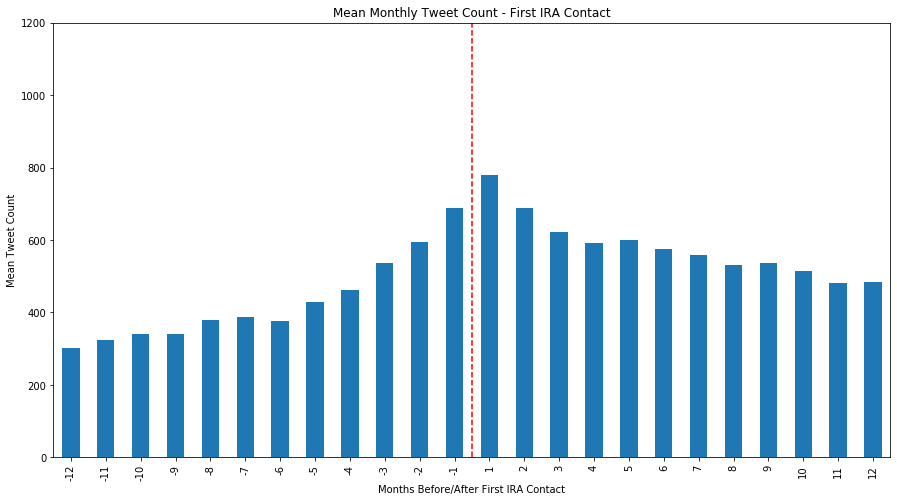

In [72]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_count.mean().plot(kind='bar', figsize=(15,8),
                            title='Mean Monthly Tweet Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfmean1_withresponse.png')
# plt.savefig('BefAfmean1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


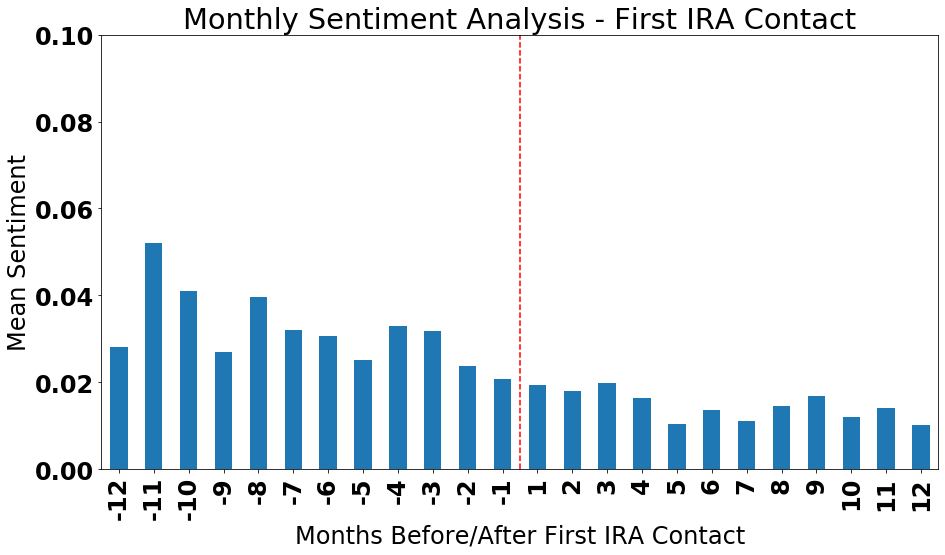

In [73]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Sentiment Analysis - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=0.10)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfsent1_withresponse.png')
# plt.savefig('BefAfsent1_noresponse.png')
plt.show()

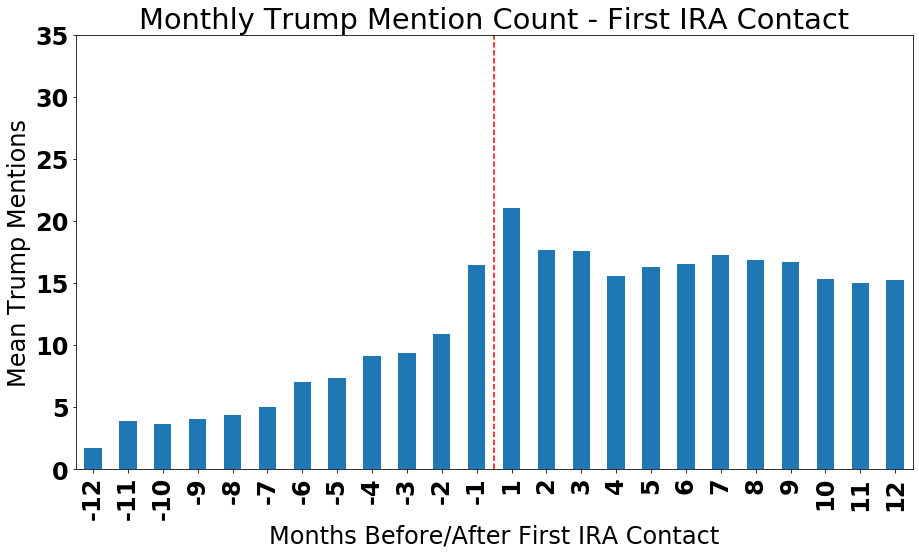

In [74]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAftrump1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

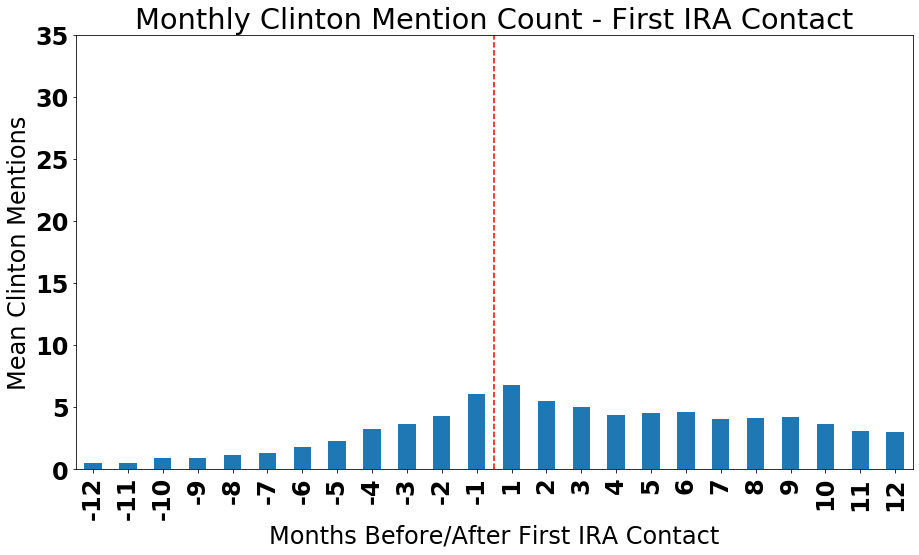

In [75]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfclinton1_withresponse.png')
# plt.savefig('BefAfclinton1_noresponse.png')
plt.show()

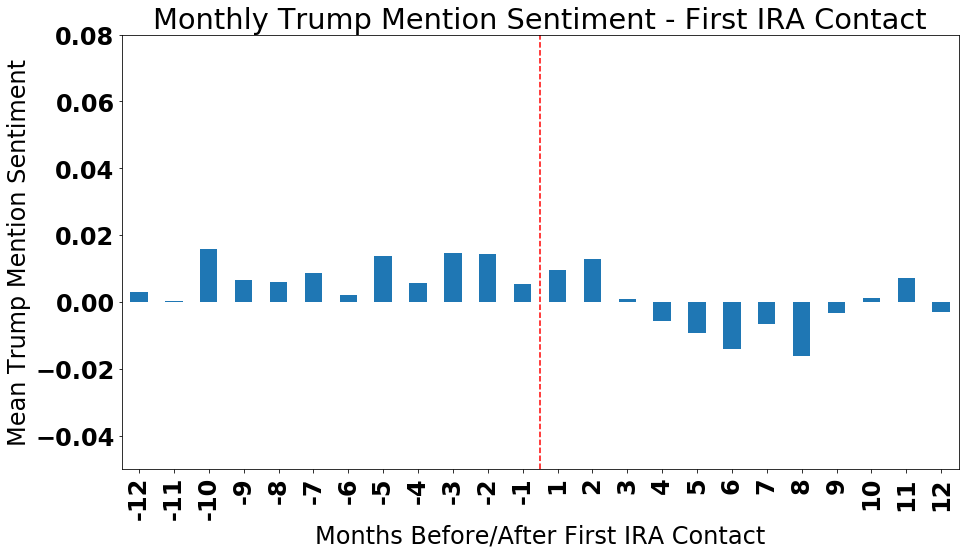

In [76]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAftrump_sent1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


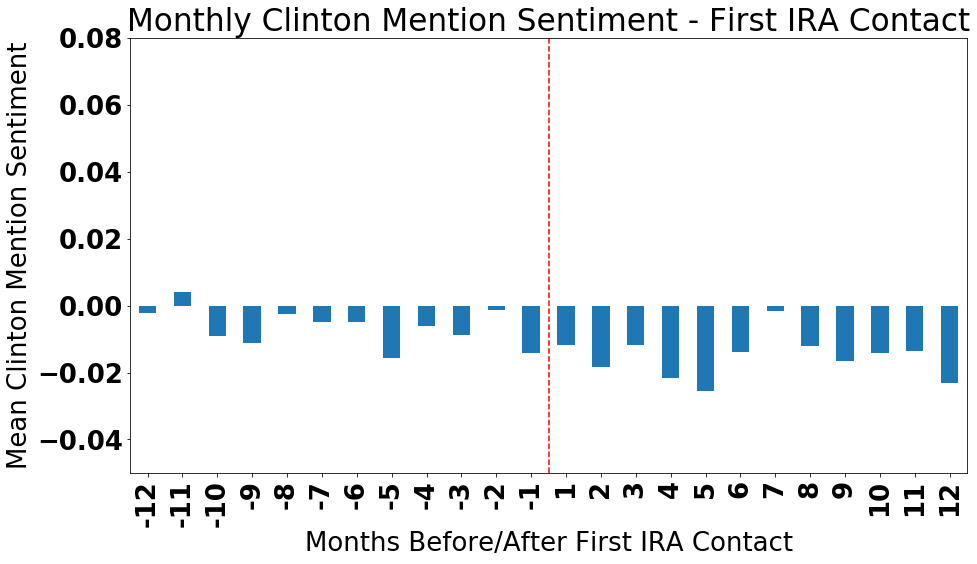

In [77]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfclinton_sent1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

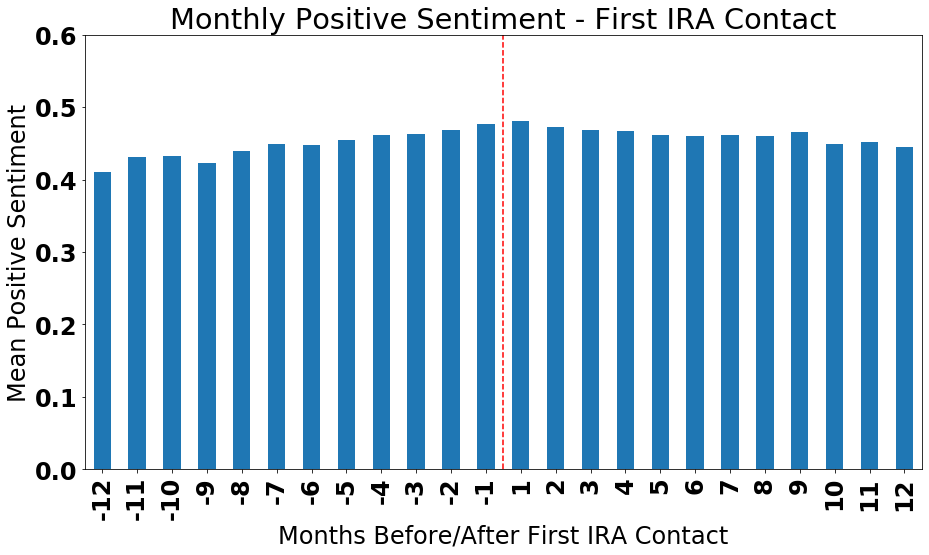

In [78]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_positive_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Positive Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfpositive_sent1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

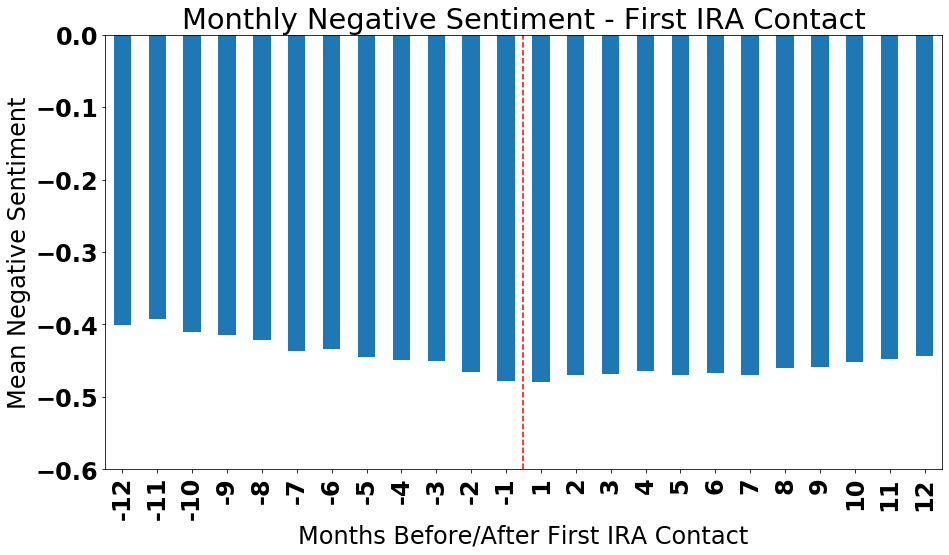

In [79]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_negative_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Negative Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfnegative_sent1_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


**Contact Point Two Plots**

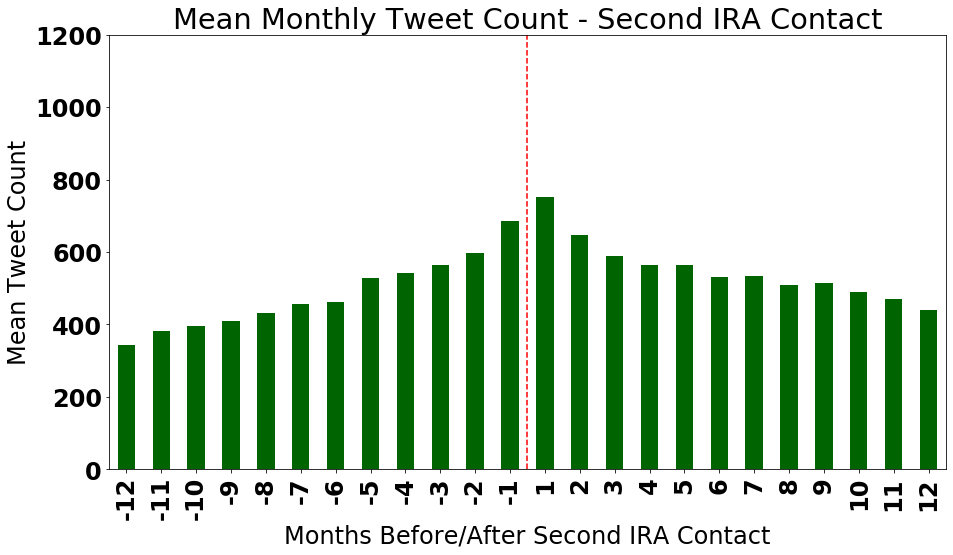

In [80]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'darkgreen',
                            title='Mean Monthly Tweet Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfmean2_withresponse.png')
# plt.savefig('BefAfmean2_noresponse.png')
plt.show()

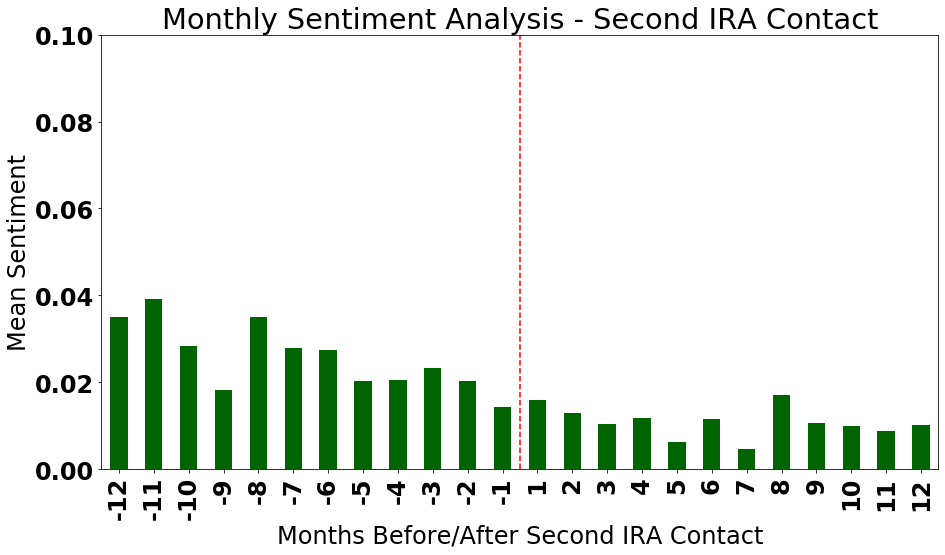

In [81]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='darkgreen',
                            title='Monthly Sentiment Analysis - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfsent2_withresponse.png')
# plt.savefig('BefAfsent2_noresponse.png')
plt.show()

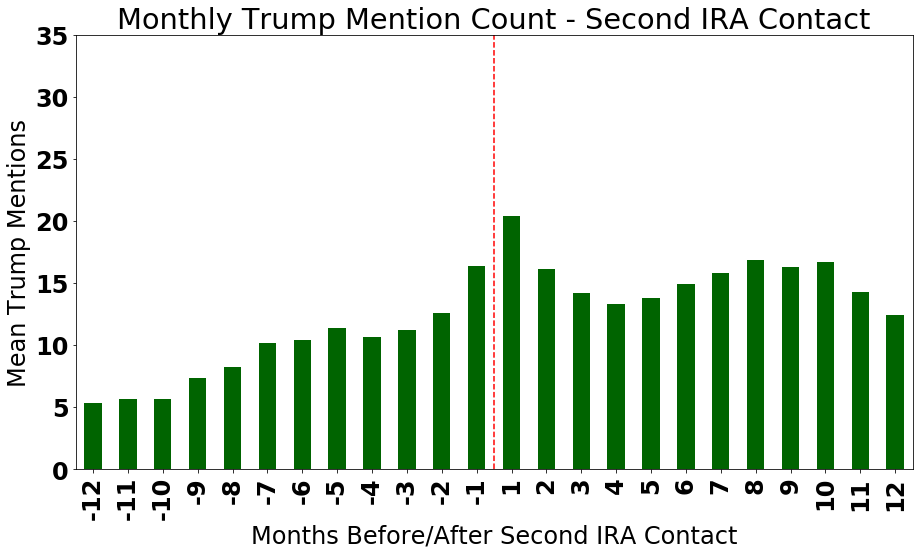

In [82]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAftrump2_withresponse.png')
# plt.savefig('BefAftrump2_noresponse.png')

plt.show()

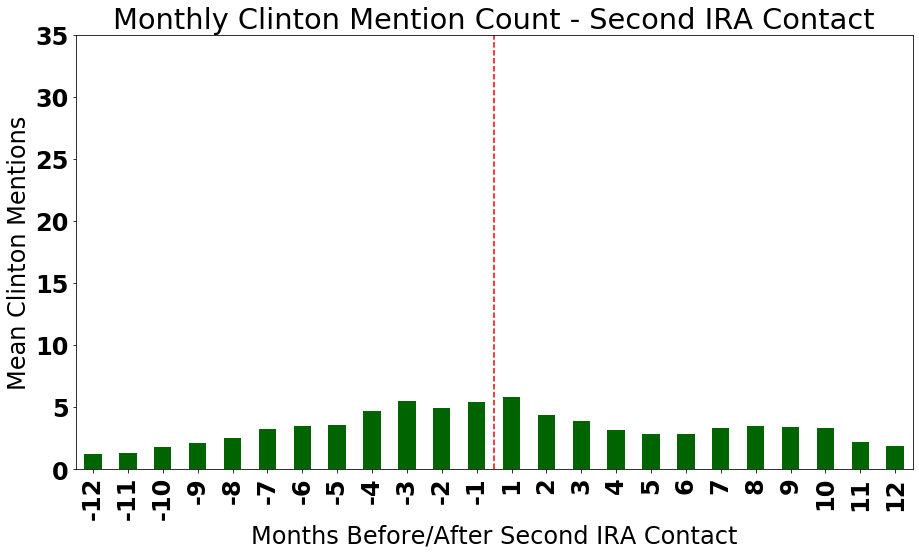

In [83]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfclinton2_withresponse.png')
# plt.savefig('BefAfclinton2_noresponse.png')

plt.show()

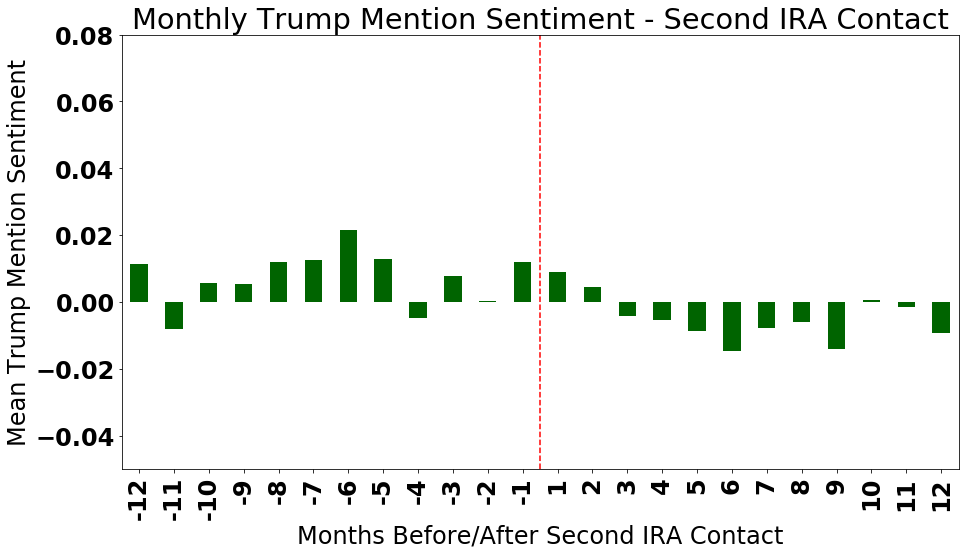

In [84]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAftrump_sent2_withresponse.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

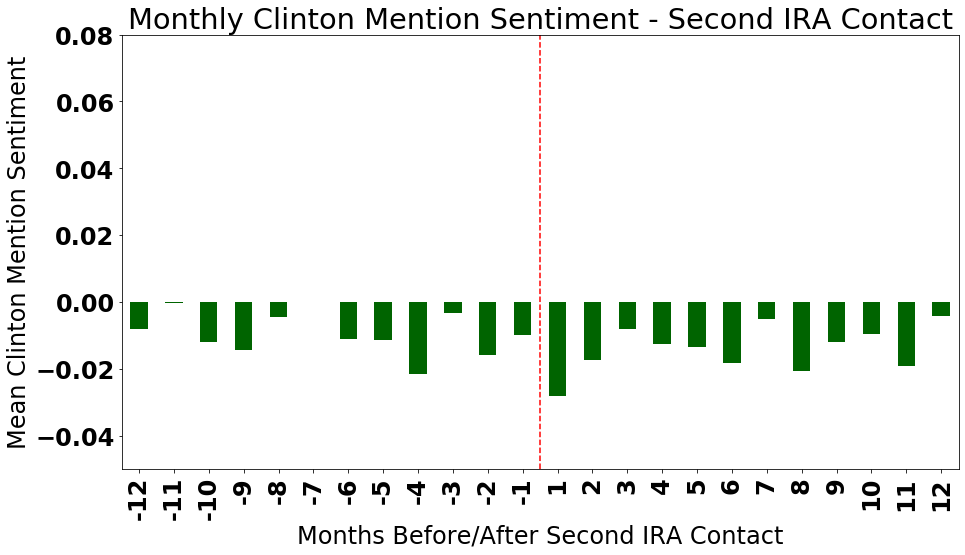

In [85]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfclinton_sent2_withresponse.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

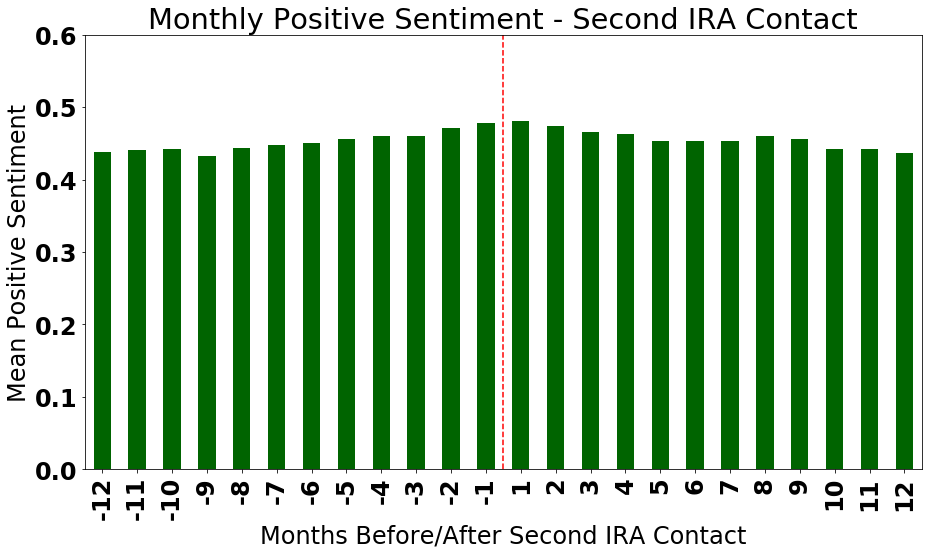

In [86]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Positive Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfpositive_sent2_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

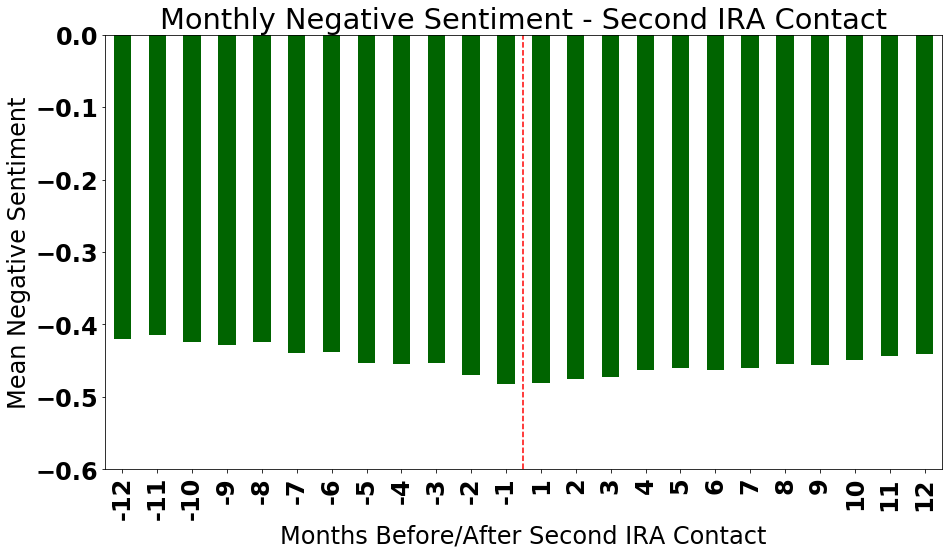

In [87]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Negative Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfnegative_sent2_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


**Contact Point Three Plots**

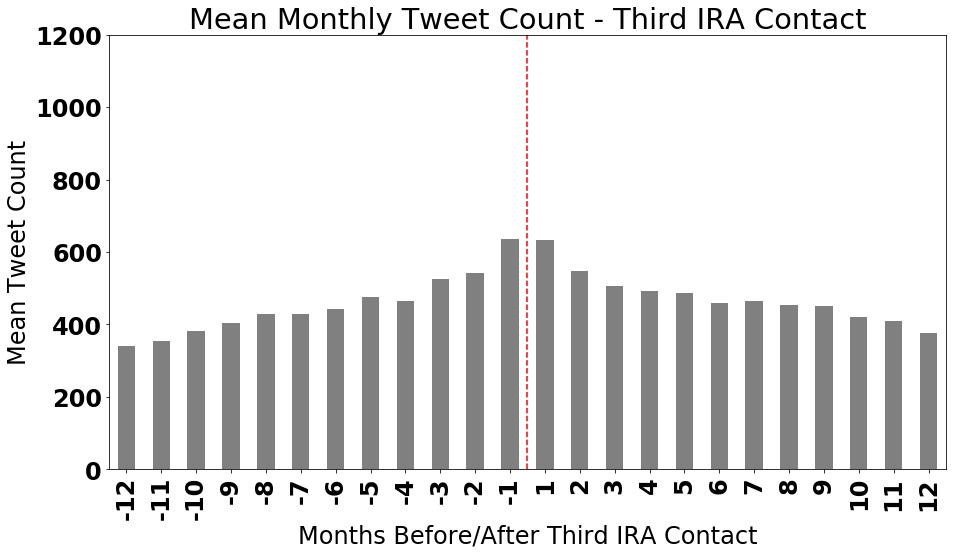

In [88]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'grey',
                            title='Mean Monthly Tweet Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfmean3_withresponse.png')
# plt.savefig('BefAfmean3_noresponse.png')

plt.show()

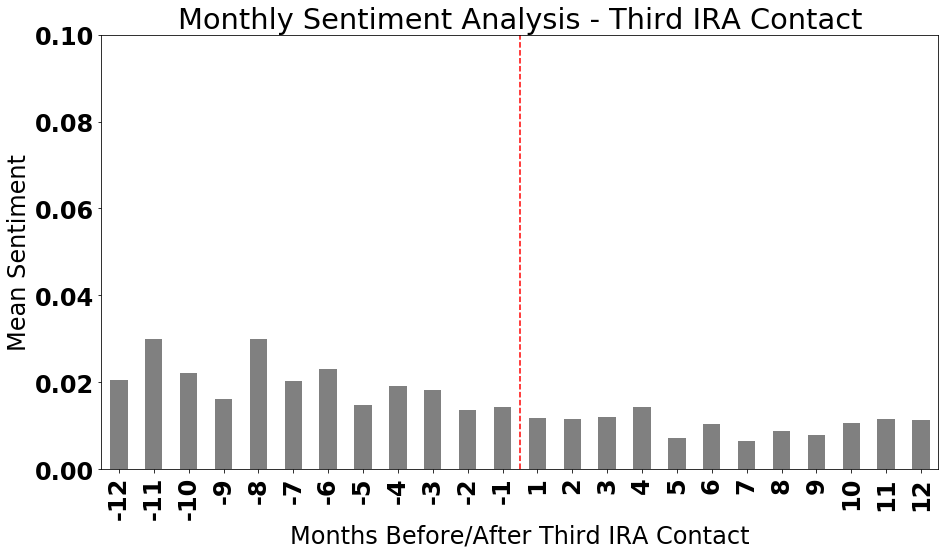

In [89]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='grey',
                            title='Monthly Sentiment Analysis - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfsent3_withresponse.png')
# plt.savefig('BefAfsent3_noresponse.png')

plt.show()

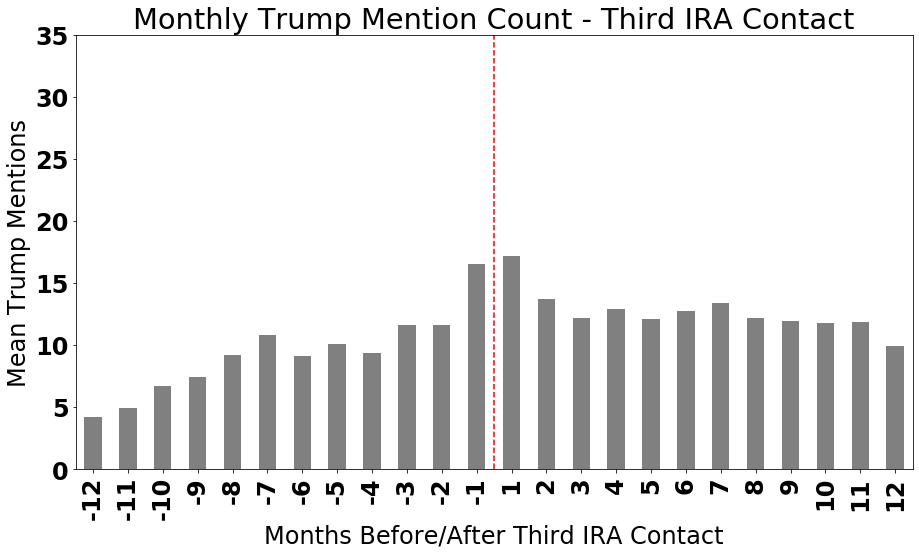

In [90]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAftrump3_withresponse.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

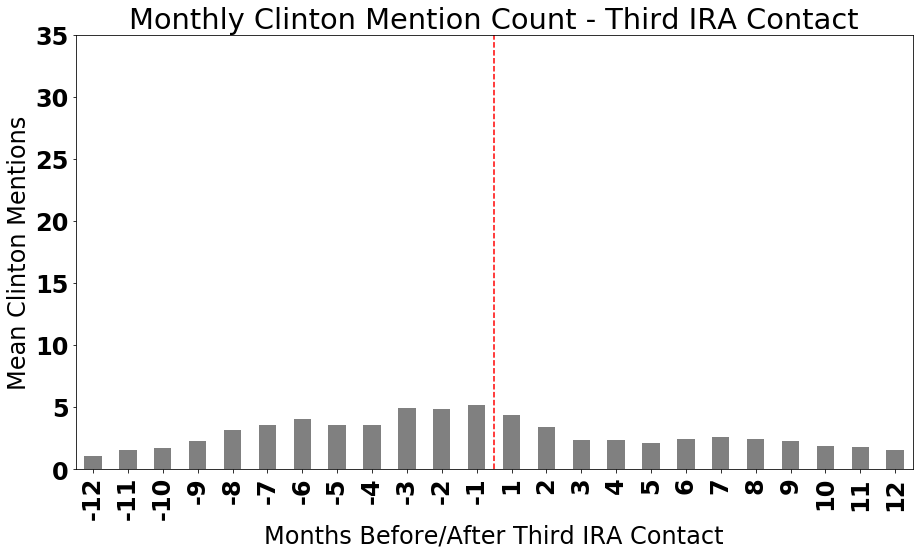

In [91]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=35)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfclinton3_withresponse.png')
# plt.savefig('BefAfclinton3_noresponse.png')

plt.show()

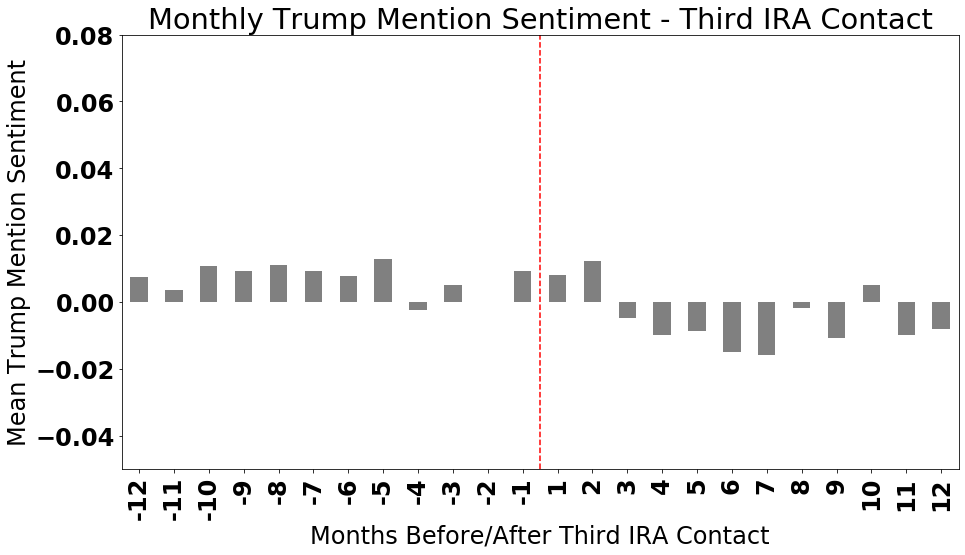

In [92]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAftrump_sent3_withresponse.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

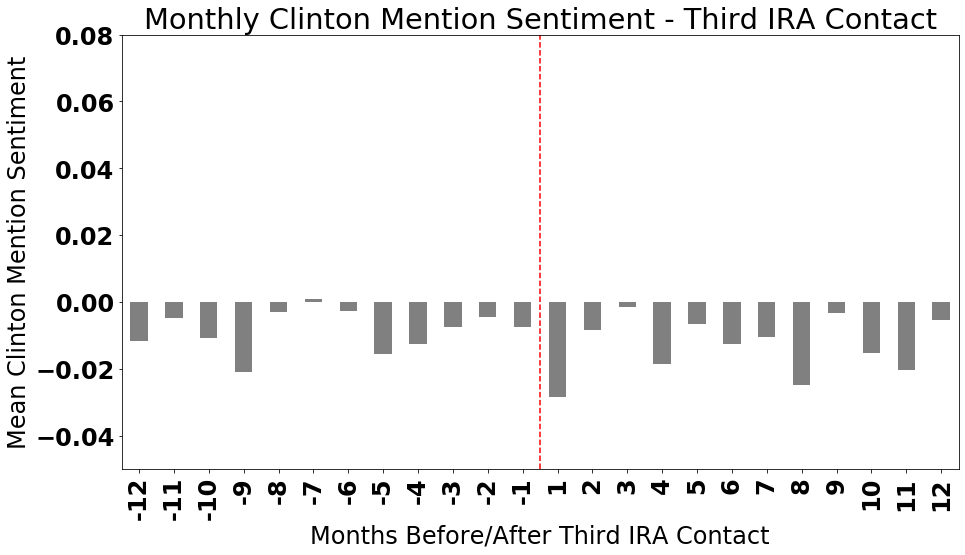

In [93]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfclinton_sent3_withresponse.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

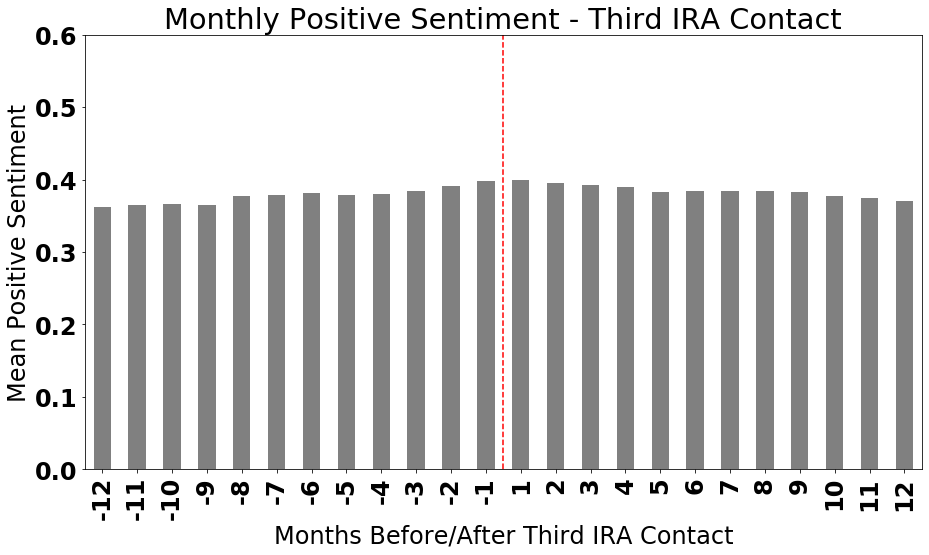

In [94]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Positive Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfpositive_sent3_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

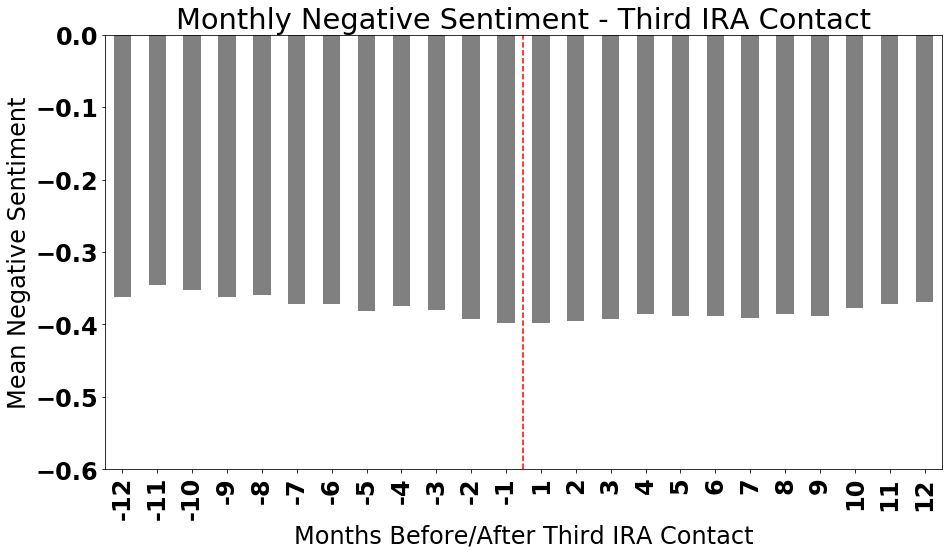

In [95]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Negative Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidRespond/BefAfnegative_sent3_withresponse.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


In [ ]:
# removeDF.to_csv('removeUsers_DidNotMentionBackUsers.csv')